<!-- hide -->
# Logistic regression - Step by step guide
<!-- endhide -->

- Understand a new dataset.
- Process it by applying exploratory data analysis (EDA).
- Model the data using logistic regression.
- Analyze the results and optimize the model.


## 🌱  How to start this project

Follow the instructions below:

1. Create a new repository based on [machine learning project](https://github.com/4GeeksAcademy/machine-learning-python-template/generate) by [clicking here](https://github.com/4GeeksAcademy/machine-learning-python-template).
2. Open the newly created repository in Codespace using the [Codespace button extension](https://docs.github.com/en/codespaces/developing-in-codespaces/creating-a-codespace-for-a-repository#creating-a-codespace-for-a-repository).
3. Once the Codespace VSCode has finished opening, start your project by following the instructions below.

## 🚛 How to deliver this project

Once you have finished solving the exercises, be sure to commit your changes, push to your repository and go to 4Geeks.com to upload the repository link.

## 📝 Instructions

### Banking Marketing Campaign

**Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

**Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

#### Step 1: Loading the dataset

The dataset can be found in this project folder under the name `bank-marketing-campaign-data.csv`. You can load it into the code directly from the link (`https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv`) or download it and add it by hand in your repository. In this dataset you will find the following variables:

1. `age`. Age of customer (numeric)
2. `job`. Type of job (categorical)
3. `marital`. Marital status (categorical)
4. `education`. Level of education (categorical)
5. `default`. do you currently have credit (categorical) 6. housing.
6. `housing`. do you have a housing loan (categorical) 7. loan.
7. `loan`. Do you have a personal loan? (categorical)
8. `contact`. Type of contact communication (categorical)
9. `month`. Last month in which you have been contacted (categorical)
10. `day_of_week`. Last day on which you have been contacted (categorical)
11. `duration`. Duration of previous contact in seconds (numeric)
12. `campaign`. Number of contacts made during this campaign to the customer (numeric)
13. `pdays`. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
14. `previous`. Number of contacts made during the previous campaign to the customer (numeric)
15. `poutcome`. Result of the previous marketing campaign (categorical).
16. `emp.var.rate`. Employment variation rate. Quarterly indicator (numeric)
17. `cons.price.idx`. Consumer price index. Monthly indicator (numeric)
18. `cons.conf.idx`. Consumer confidence index. Monthly indicator (numeric)
19. `euribor3m`. EURIBOR 3-month rate. Daily indicator (numeric)
20. `nr.employed`. Number of employees. Quarterly indicator (numeric)
21. `y`. TARGET. Whether the customer takes out a long-term deposit or not

#### Step 2: Perform a full EDA

This second step is vital to ensure that we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information. Use the example Notebook we worked on and adapt it to this use case.

Be sure to conveniently divide the data set into `train` and `test` as we have seen in previous lessons.

#### Step 3: Build a logistic regression model

You do not need to optimize the hyperparameters. Start by using a default definition and improve it in the next step.

#### Step 4: Optimize the previous model

After training the model, if the results are not satisfactory, optimize it using one of the techniques seen above.

> NOTE: Solution: https://github.com/4GeeksAcademy/logistic-regression-project-tutorial/blob/main/solution.ipynb

<a id="0"></a> <br>
 # Table of Contents  
1. [Problem Statement](#1)     
1. [Analyze Data & Data Cleaning](#2) 
    1. [Eliminate Duplicates](#3)
    1. [Eliminate Irrelevant Data](#4)
1. [EDA Exploratory Data Analysis](#5)
    1. [Statistics Summary](#6)   
    1. [Analysis of Univariate Variables](#5) 
        1. [Analysis of Categorical Variables](#6)
        1. [Analysis of Numeric Variables](#7) 
    1. [Analysis of Multivariate Variables](#8)
        1. [Numerical-numerical analysis](#9)
        1. [Categorical-categorical Analysis](#10)
        1. [Combinations of class with various predicators](#11)
        1. [Correlation analysis](#12)
        1. [Numerical-cateogircal analysis](#13)
1. [Data Cleaning & Reduction](#14)    
1. [Feature Engineering](#15)    
    1. [Outlier Analysis](#16)
    1. [Descriptive Analysis](#17)
    1. [Missing Value Analysis](#18)
    1. [Inference of new features](#19)
1. [Feature Scaling](#20)
    1. [Normalization](#21)
    1. [Min-max Scaling](#22)     
1. [Feature Selection](#23) 
1. [Modeling And Optimization](#24)

In [1]:
import pandas as pd
import numpy as np 
import wget
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from patsy import dmatrices

In [6]:
#csv_url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
#save_path = '/workspaces/machine-learning-python-template-ds-2023/Rashid/Banking-Marketing-Campaign/data/raw'

#wget.download(csv_url, save_path)



In [2]:

file_path = '/Users/rashidbaset/Downloads/Banking-marketing-campaign/Banking-Marketing-Campaign/data/raw/bank-marketing-campaign-data.csv'
df = pd.read_csv(file_path, delimiter=';')

In [3]:
pd.set_option('display.max_columns', None)

<a id="2"></a>
### Exploration And Data Cleaning

#### Analyzing the data

In [103]:
df.head(10)

age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0  telephone   may         mon  4.350000         1    999         0   
1  telephone   may         mon  2.483333         1    999         0   
2  telephone   may         mon  3.766667         1    999         0   
3  telephone   may         mon  2.516667         1    999         0   
4  telephone   may         mon  5.116667         1    999         0   
5  telephone   may         mon  3.300000         1    999         0   
6  telephone   may         mon  2.316667         1    999         0   
7  telephone   may         mon  3.616667         1    999         0   
8  telephone   may         mon  6.333333         1    999         0   
9  telephone   may         mon  0.833333         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent           1.1          93.994          -36.4      4.857   
1  nonexistent           1.1          93.994          -36.4      4.857   
2  nonexistent           1.1          93.994          -36.4      4.857   
3  nonexistent           1.1          93.994          -36.4      4.857   
4  nonexistent           1.1          93.994          -36.4      4.857   
5  nonexistent           1.1          93.994          -36.4      4.857   
6  nonexistent           1.1          93.994          -36.4      4.857   
7  nonexistent           1.1          93.994          -36.4      4.857   
8  nonexistent           1.1          93.994          -36.4      4.857   
9  nonexistent           1.1          93.994          -36.4      4.857   

   nr.employed  y  
0       5191.0  0  
1       5191.0  0  
2       5191.0  0  
3       5191.0  0  
4       5191.0  0  
5       5191.0  0  
6       5191.0  0  
7       5191.0  0  
8       5191.0  0  
9       5191.0  0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
# Convert seconds to minutes
df['duration'] = df['duration'] / 60  

#### Check for duplicates

In [12]:
#duplicates = df[df.duplicated()]
#duplicates

#### Missing values calculation

In [13]:
#df.isnull().sum()

### Split the data

In [49]:
#X = df.drop(columns=['y'])  # Features
#y = df['y']  # Target labels

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train represent your training data, and X_test and y_test represent your test data.


In [50]:
#df = X

### EDA 

#### Statistics Summary

In [16]:
df.describe().T

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0     4.304750    4.321321     0.000     1.700   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%          75%          max  
age               38.000    47.000000    98.000000  
duration           3.000     5.316667    81.966667  
campaign           2.000     3.000000    56.000000  
pdays            999.000   999.000000   999.000000  
previous           0.000     0.000000     7.000000  
emp.var.rate       1.100     1.400000     1.400000  
cons.price.idx    93.749    93.994000    94.767000  
cons.conf.idx    -41.800   -36.400000   -26.900000  
euribor3m          4.857     4.961000     5.045000  
nr.employed     5191.000  5228.100000  5228.100000

In [17]:
df.describe(include='all').T

count unique                top   freq         mean  \
age             41188.0    NaN                NaN    NaN     40.02406   
job               41188     12             admin.  10422          NaN   
marital           41188      4            married  24928          NaN   
education         41188      8  university.degree  12168          NaN   
default           41188      3                 no  32588          NaN   
housing           41188      3                yes  21576          NaN   
loan              41188      3                 no  33950          NaN   
contact           41188      2           cellular  26144          NaN   
month             41188     10                may  13769          NaN   
day_of_week       41188      5                thu   8623          NaN   
duration        41188.0    NaN                NaN    NaN      4.30475   
campaign        41188.0    NaN                NaN    NaN     2.567593   
pdays           41188.0    NaN                NaN    NaN   962.475454   
previous        41188.0    NaN                NaN    NaN     0.172963   
poutcome          41188      3        nonexistent  35563          NaN   
emp.var.rate    41188.0    NaN                NaN    NaN     0.081886   
cons.price.idx  41188.0    NaN                NaN    NaN    93.575664   
cons.conf.idx   41188.0    NaN                NaN    NaN     -40.5026   
euribor3m       41188.0    NaN                NaN    NaN     3.621291   
nr.employed     41188.0    NaN                NaN    NaN  5167.035911   

                       std     min     25%     50%       75%        max  
age               10.42125    17.0    32.0    38.0      47.0       98.0  
job                    NaN     NaN     NaN     NaN       NaN        NaN  
marital                NaN     NaN     NaN     NaN       NaN        NaN  
education              NaN     NaN     NaN     NaN       NaN        NaN  
default                NaN     NaN     NaN     NaN       NaN        NaN  
housing                NaN     NaN     NaN     NaN       NaN        NaN  
loan                   NaN     NaN     NaN     NaN       NaN        NaN  
contact                NaN     NaN     NaN     NaN       NaN        NaN  
month                  NaN     NaN     NaN     NaN       NaN        NaN  
day_of_week            NaN     NaN     NaN     NaN       NaN        NaN  
duration          4.321321     0.0     1.7     3.0  5.316667  81.966667  
campaign          2.770014     1.0     1.0     2.0       3.0       56.0  
pdays           186.910907     0.0   999.0   999.0     999.0      999.0  
previous          0.494901     0.0     0.0     0.0       0.0        7.0  
poutcome               NaN     NaN     NaN     NaN       NaN        NaN  
emp.var.rate       1.57096    -3.4    -1.8     1.1       1.4        1.4  
cons.price.idx     0.57884  92.201  93.075  93.749    93.994     94.767  
cons.conf.idx     4.628198   -50.8   -42.7   -41.8     -36.4      -26.9  
euribor3m         1.734447   0.634   1.344   4.857     4.961      5.045  
nr.employed      72.251528  4963.6  5099.1  5191.0    5228.1     5228.1

#### Analysis of Univariate Variables

In [62]:
# separate numeric and cateogircal variables

cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Numerical Variables:
['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


##### Analysis of Categorical Variables

- Categorical 
    - Binary
        - `default` 
        - `housing`
        - `loan`
        - `y`
    - Nominal
        - `contact`
        - `job` 
        - `marital` 
        - `month` 
        - `day_of_week` 
        - `poutcome` 
    - Ordinal
        - `education`

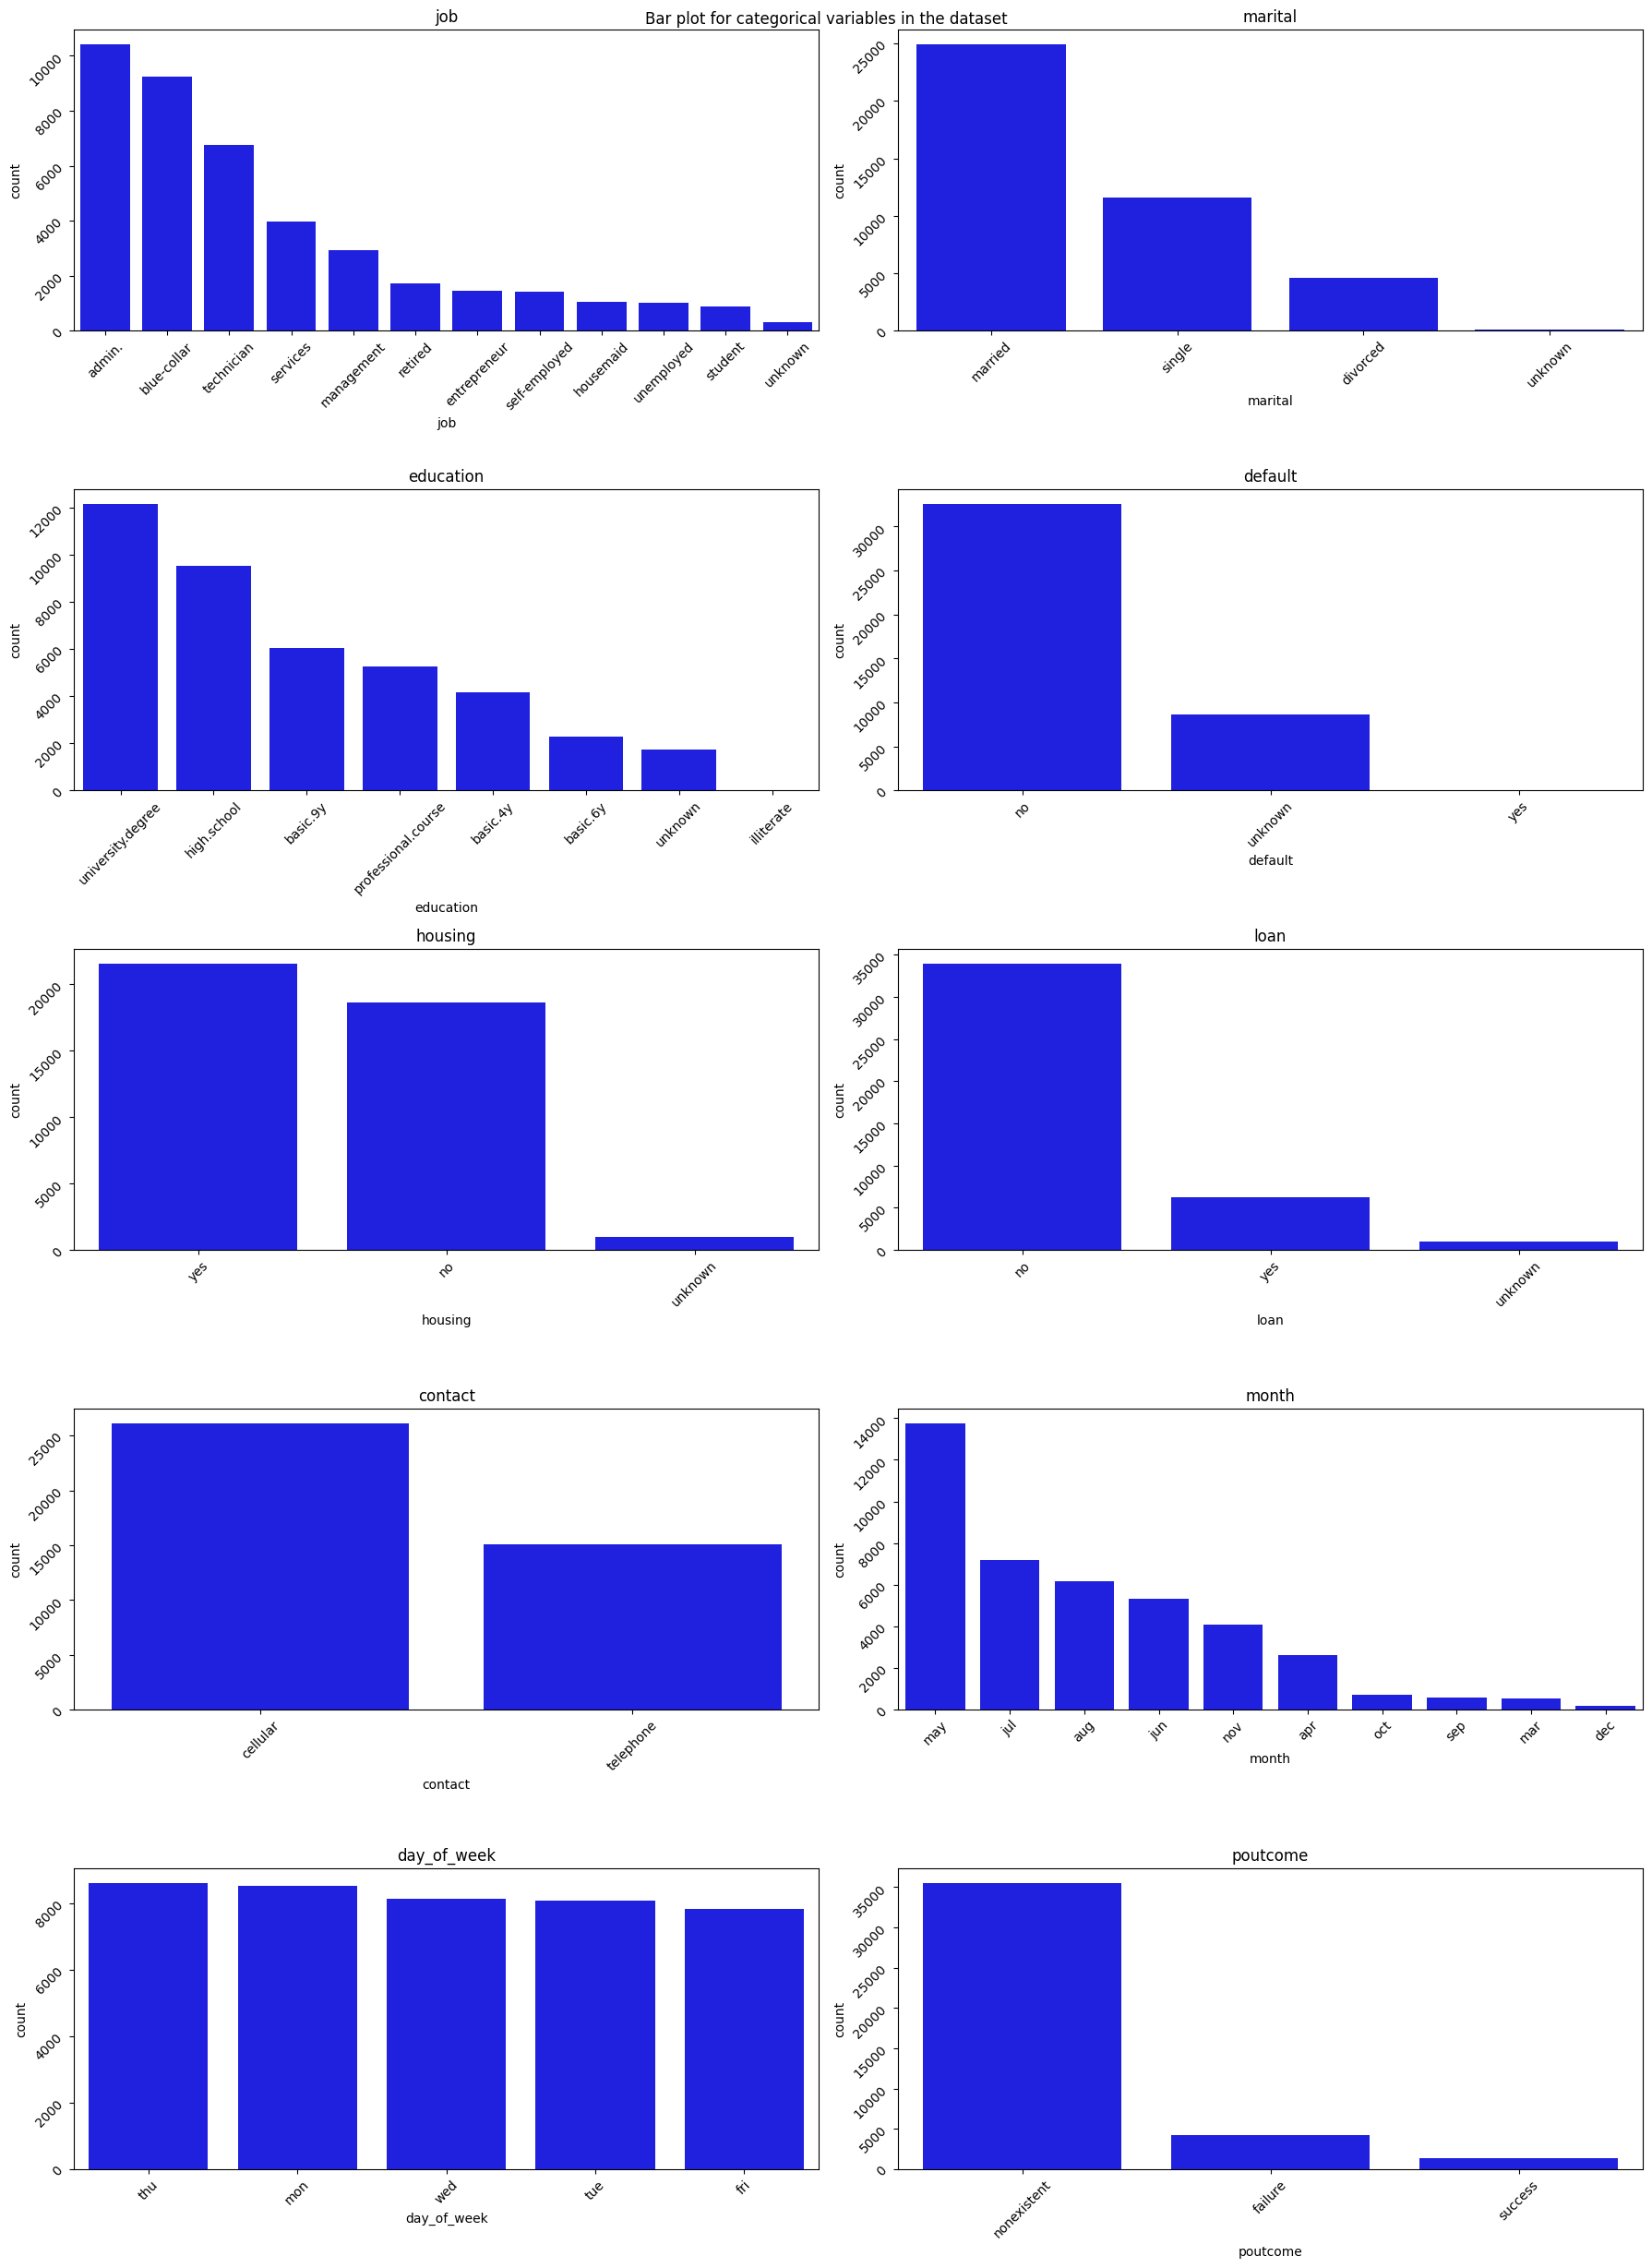

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of categorical variables
categorical_variables = cat_cols

# Calculate the number of rows and columns for subplots
num_variables = len(categorical_variables)
cols = 2
rows = num_variables // cols + (num_variables % cols > 0)  # Add an extra row for odd number of variables

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
fig.suptitle('Bar plot for categorical variables in the dataset')

# Iterate through each categorical variable and create count plots
for i, variable in enumerate(categorical_variables):
    row = i // cols
    col = i % cols
    sns.countplot(x=variable, data=df, color='blue', order=df[variable].value_counts().index, ax=axes[row, col])
    axes[row, col].set_title(variable)
    axes[row, col].tick_params(labelrotation=45)  # Rotate x-axis labels for better visibility if needed

# Remove empty subplots if the number of variables is odd
if num_variables % cols != 0:
    for i in range(num_variables % cols, cols):
        fig.delaxes(axes[rows - 1, i])

plt.tight_layout()
plt.show()



Possible tranformations:

- `education`
    - Combine "basic.9y," "basic.6y," and "basic.4y" into a single category named "Basic Education." This combines individuals with various durations of basic education
    - Combine "unknown" and "illiterate" into a category named "Unknown/Illiterate." This groups individuals with unkonw or no educational information
- `month`
    - Group months by seasons: Spring (Mar, Apr, May), Summer (Jun, Jul, Aug), Autumn (Sep, Oct, Nov), Winter (Dec, Jan, Feb)



##### Analysis of numerical variables

- Numerical
    - Continuous
        - `age`, `duration`, `pdays`,  `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`
    - Discrete
        - `campaign`, `previous`, `nr.employed`

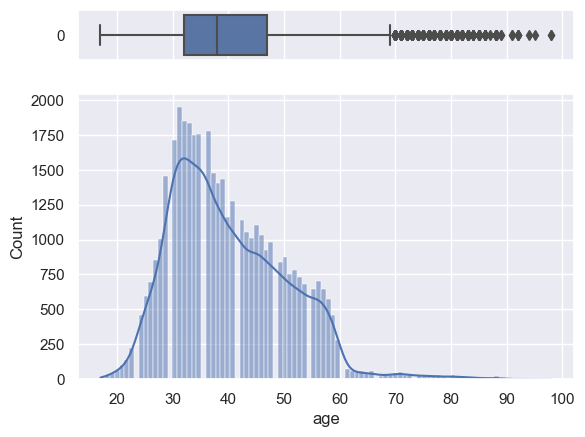

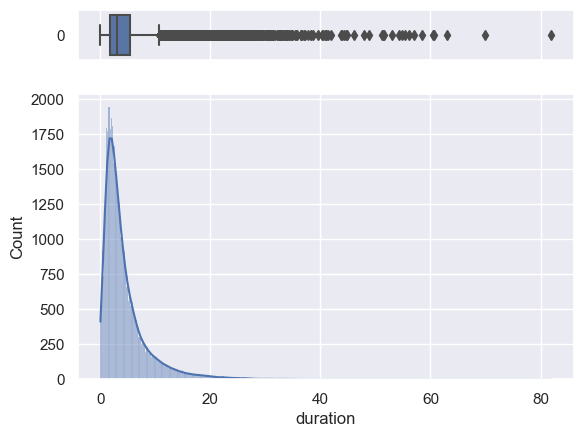

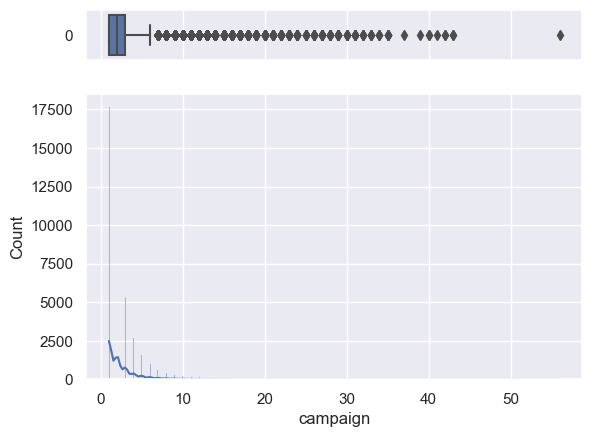

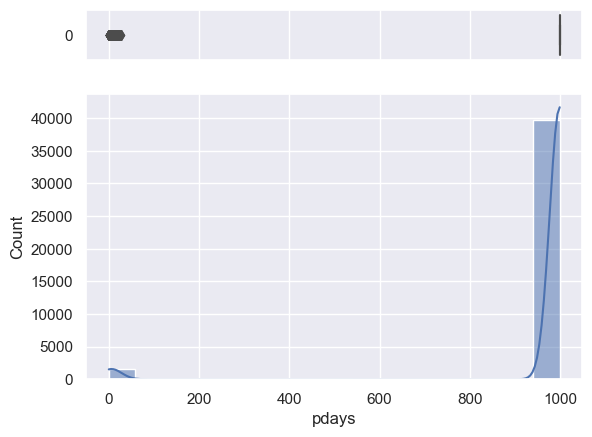

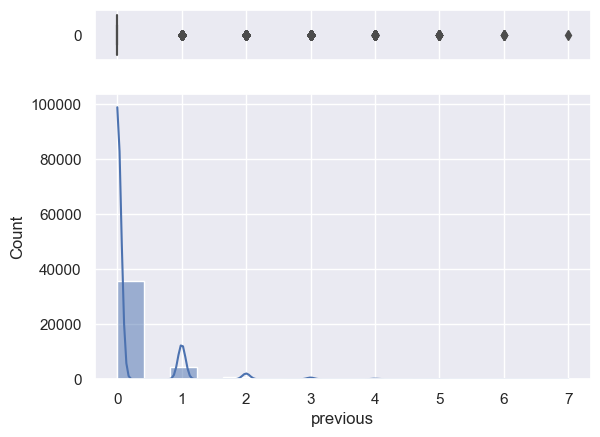

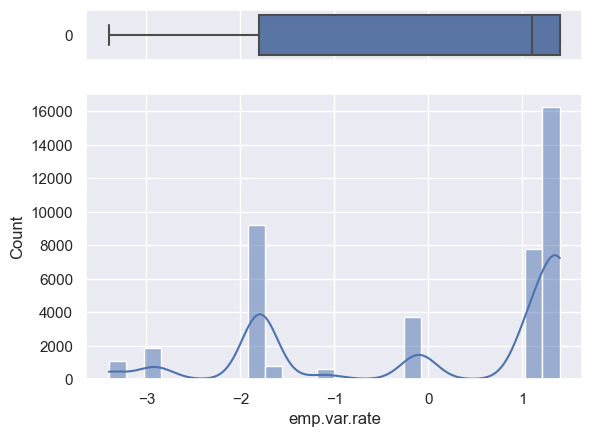

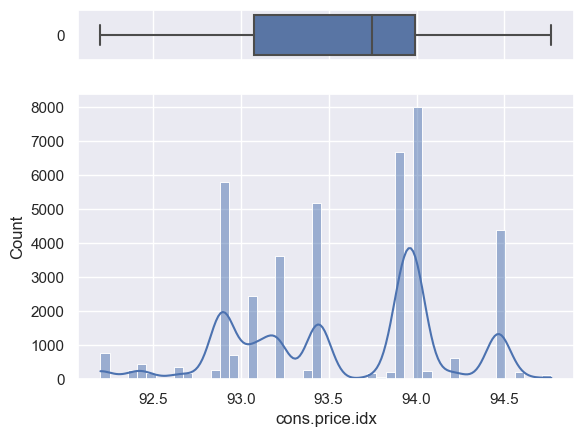

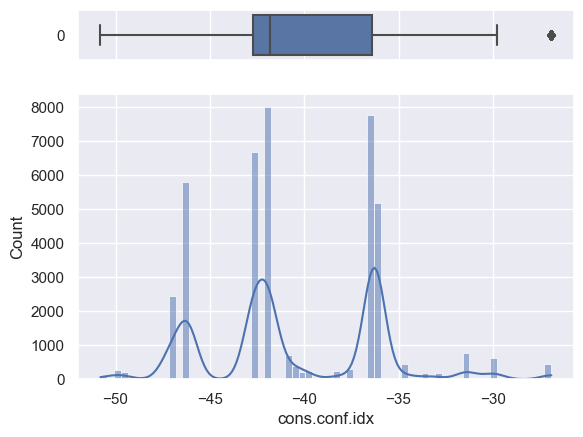

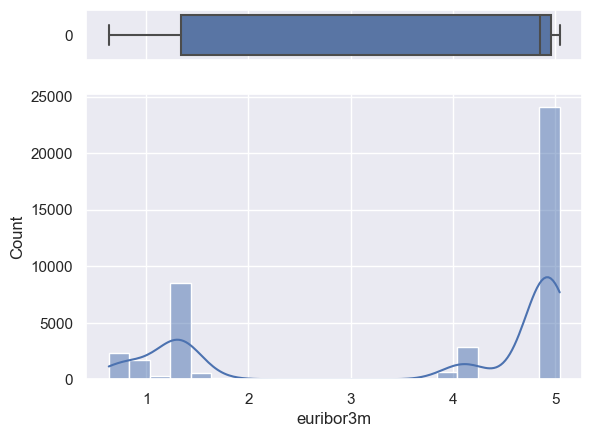

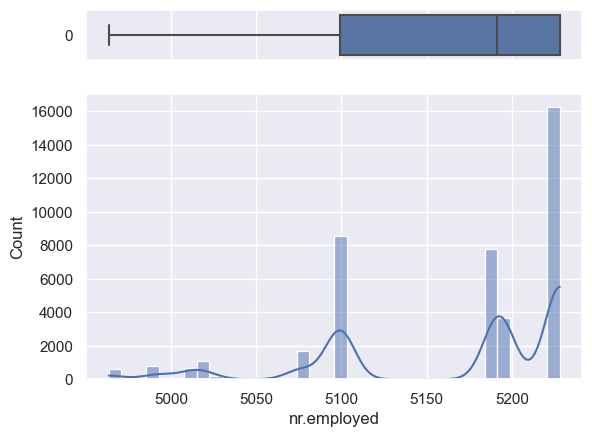

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_box_hist(data, columns_to_plot):
    # Set style to darkgrid
    sns.set(style="darkgrid")
    
    # Loop through specified columns and plot box plot and histogram
    for col in columns_to_plot:
        # Creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        
        # Assigning a graph to each ax
        sns.boxplot(data[col], orient="h", ax=ax_box)
        sns.histplot(data=data, x=col, ax=ax_hist, kde=True)  # Using histplot with kde for histogram
        
        # Remove x axis name for the boxplot
        ax_box.set(xlabel='')
        plt.show()

# Example usage:
# Assuming df is your DataFrame containing the data
# Specify the columns you want to plot
columns_to_plot = num_cols

# Call the function with the data and list of column names
plot_box_hist(df, columns_to_plot)


In [54]:
df.drop(columns=['pdays'], inplace=True)

#### Bivariate Analysis

##### Continuous-continuous

- `age`, `duration`, `pdays`,  `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`


In [55]:
continuous_cols = ['age', 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

C:\Users\Rashid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


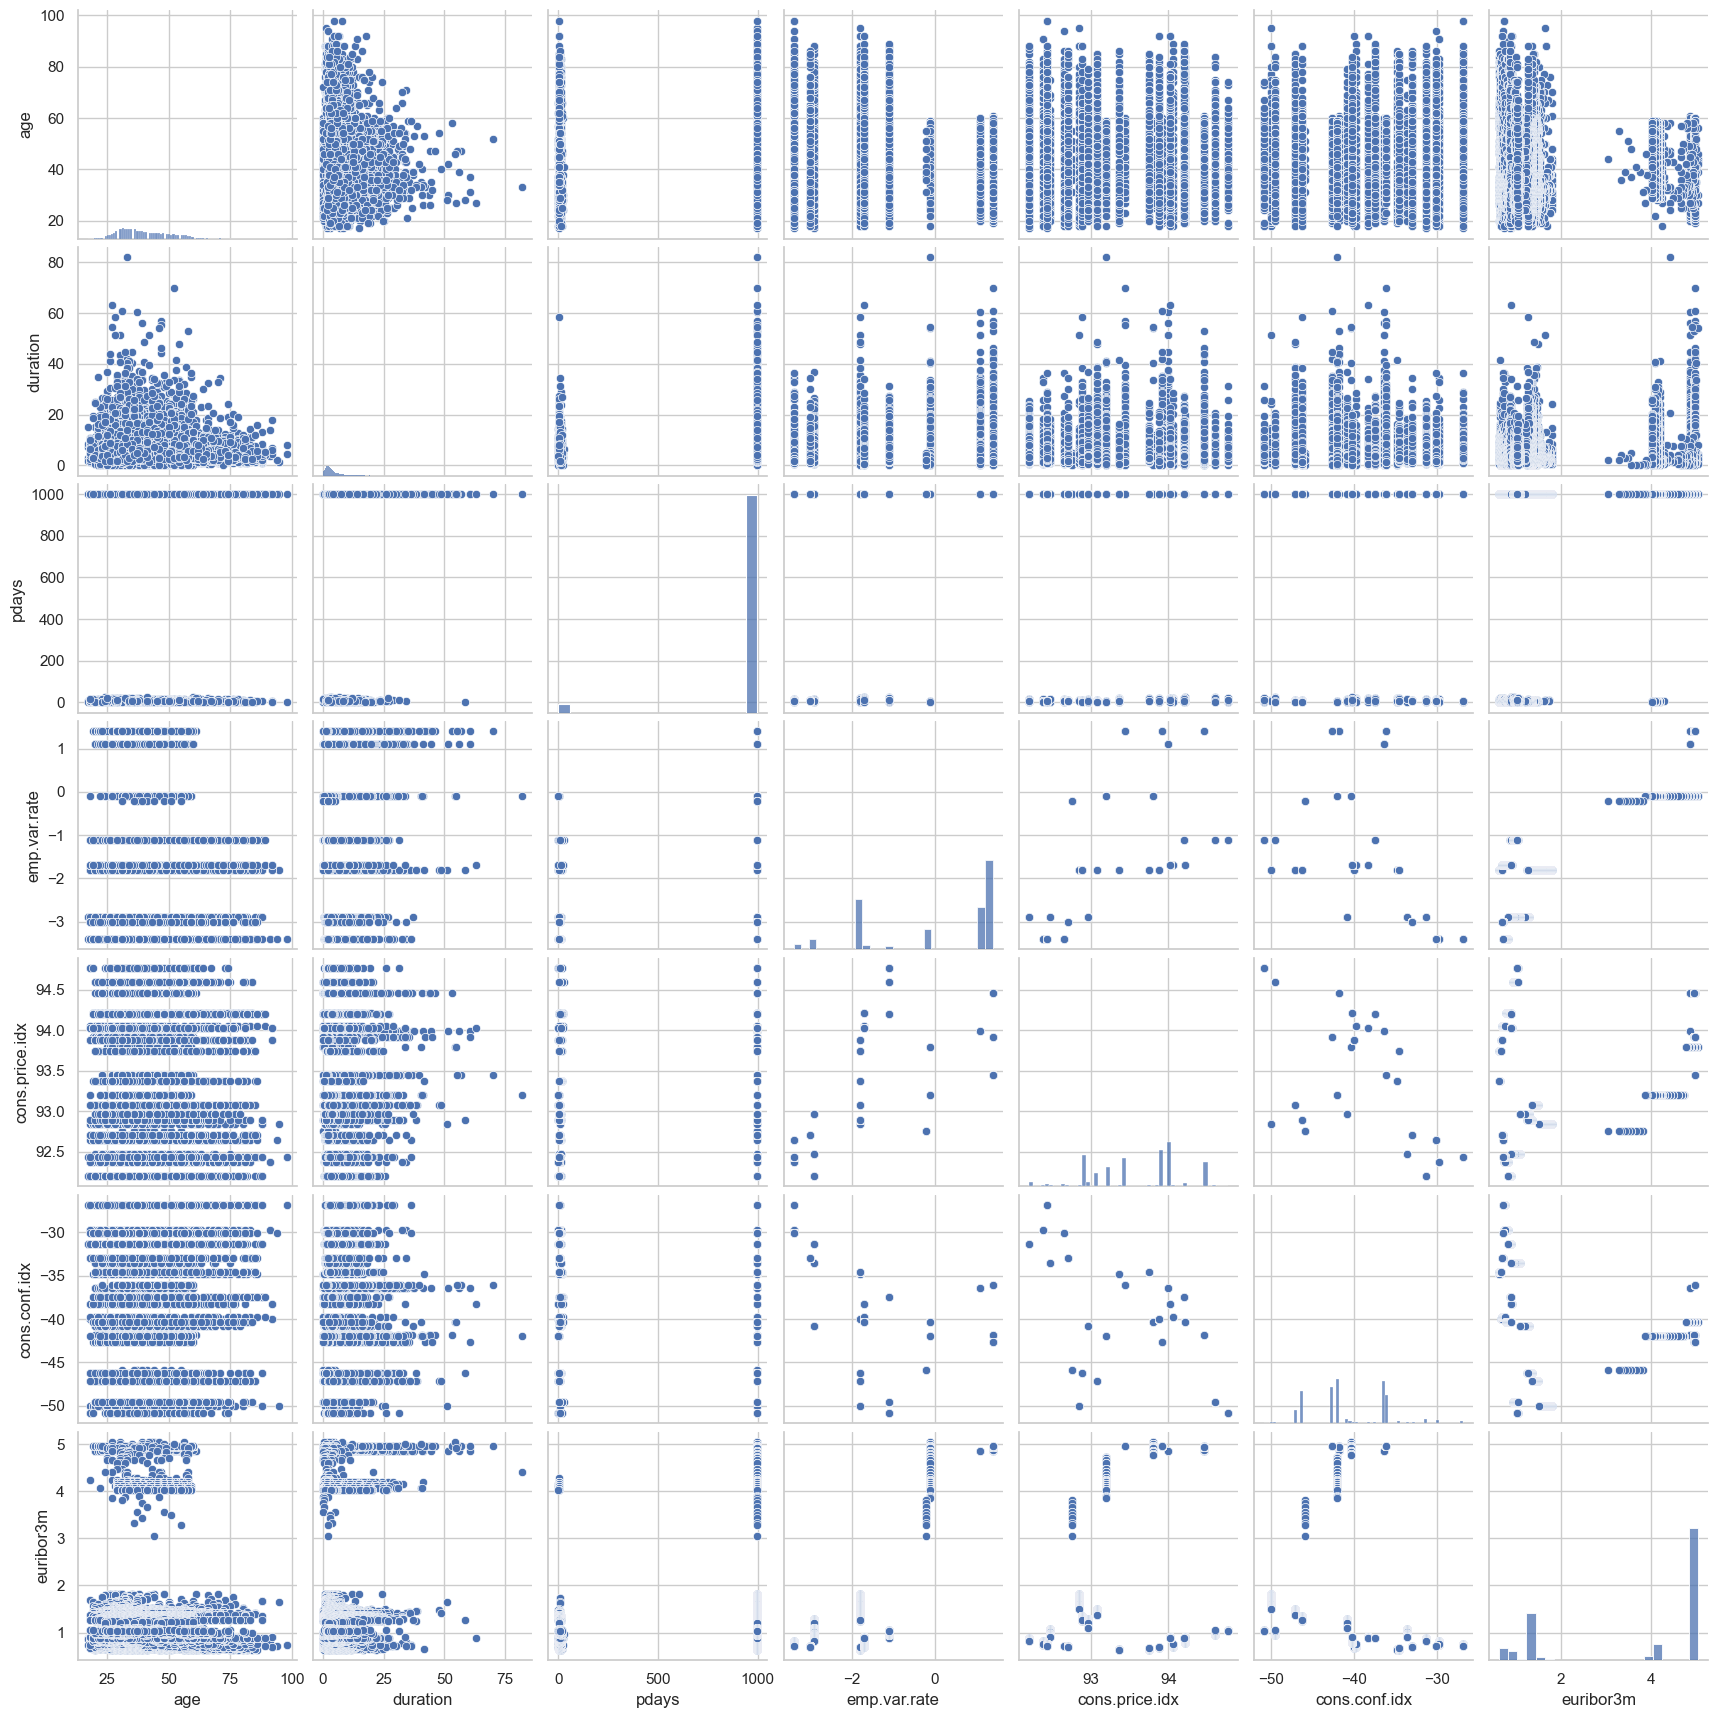

In [33]:
sns.pairplot(df[continuous_cols])

##### Categorical-categorical

In [59]:
categorical_cols = ['campaign', 'previous', 'nr.employed', 'default', 'housing', 'loan',
                    'contact', 'job', 'marital', 'month', 'day_of_week', 'poutcome', 'education']


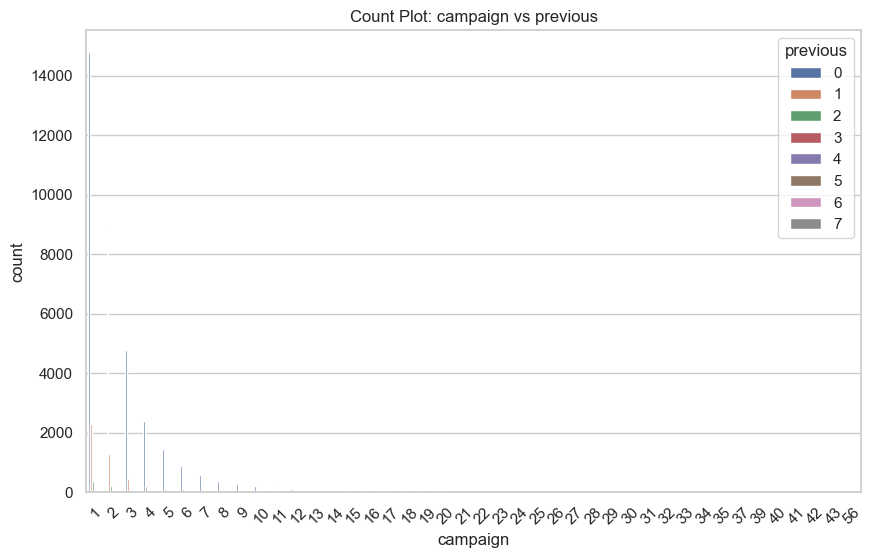

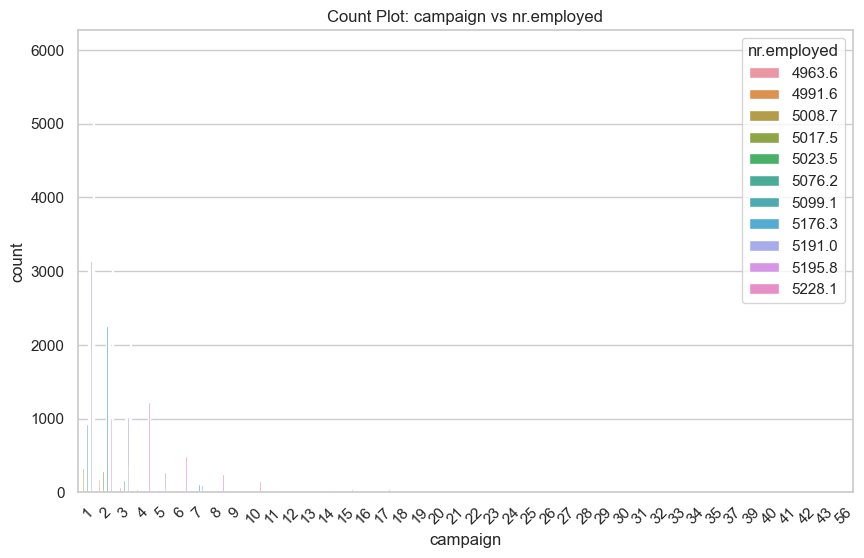

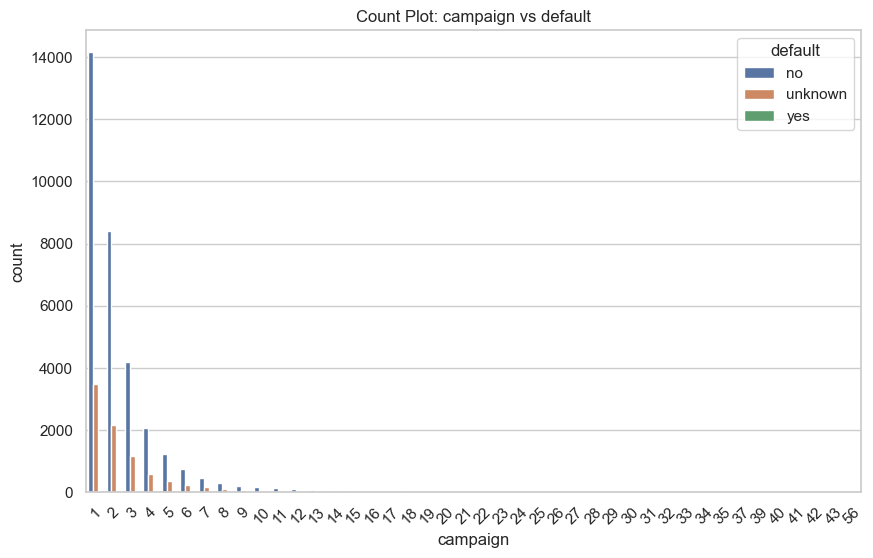

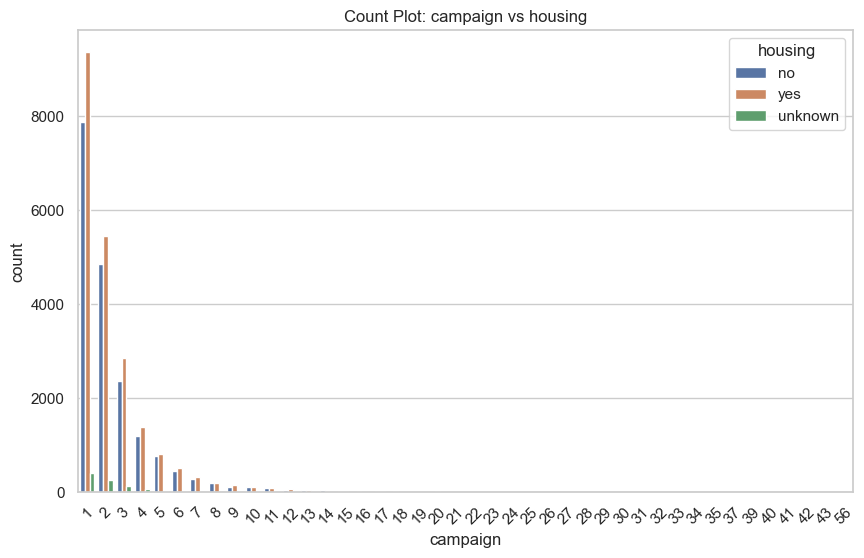

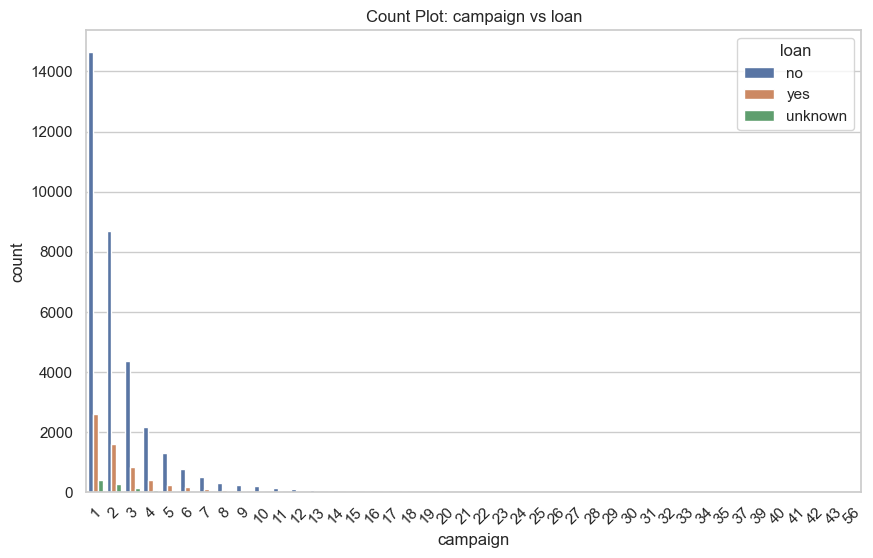

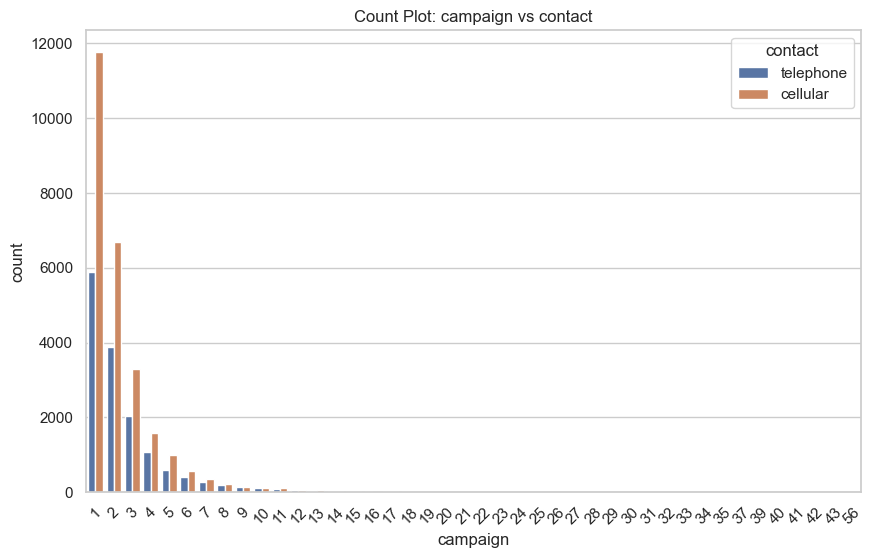

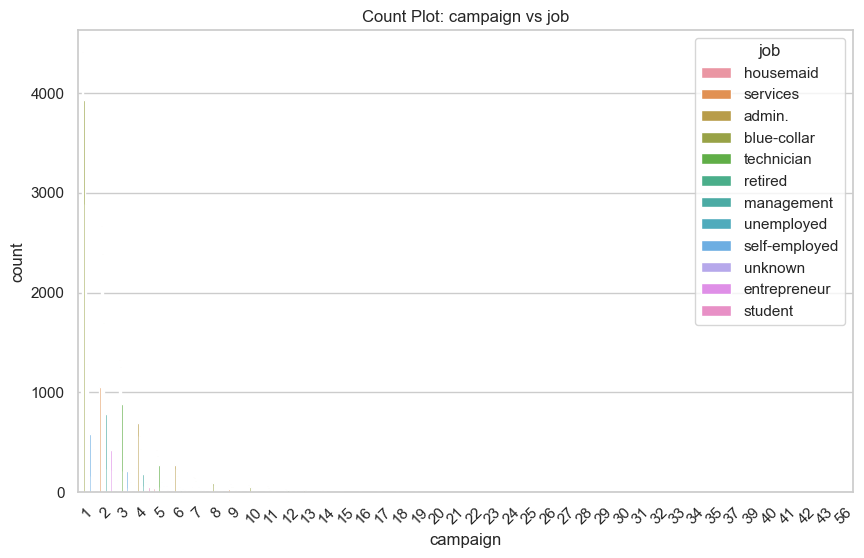

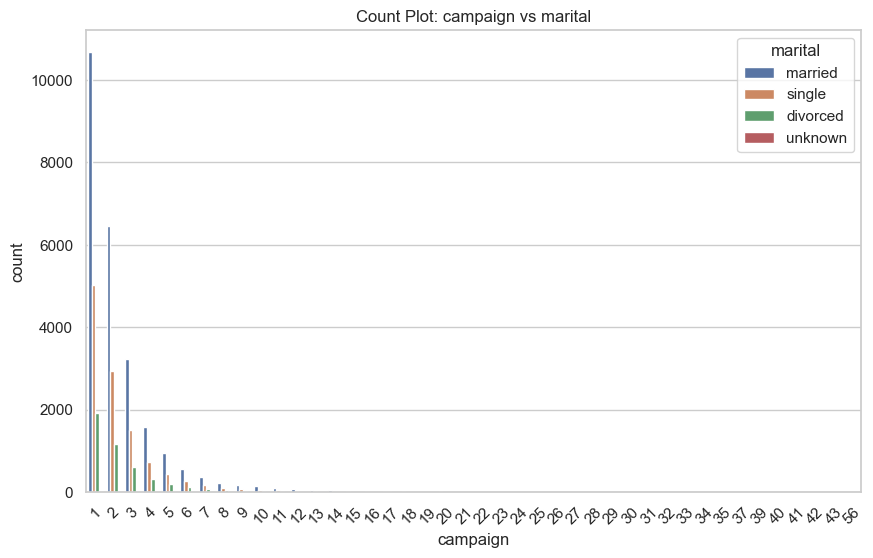

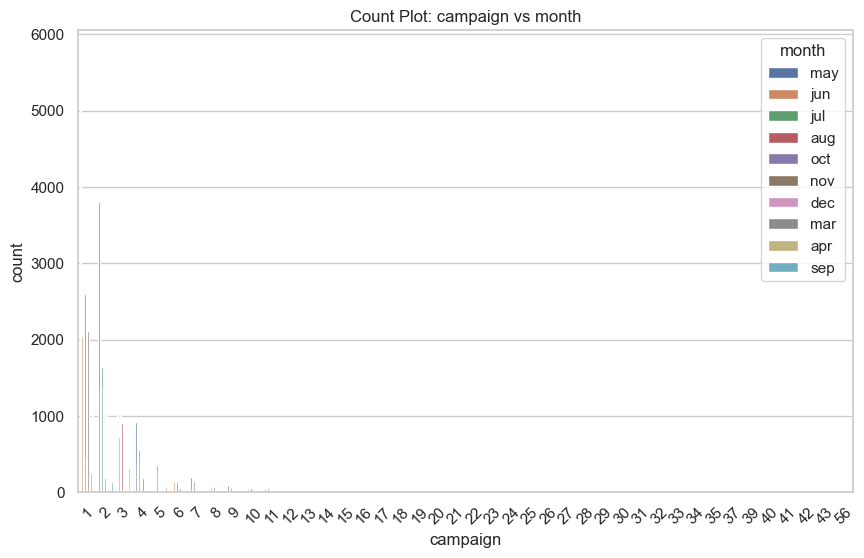

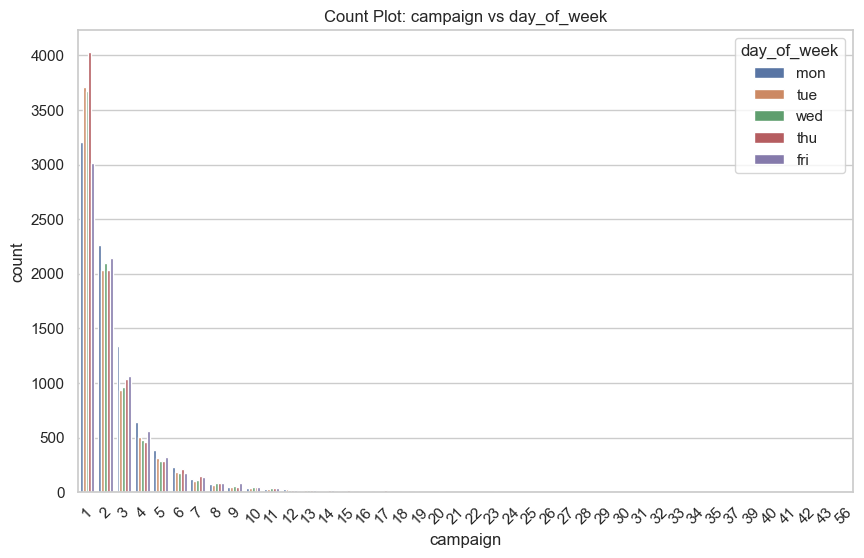

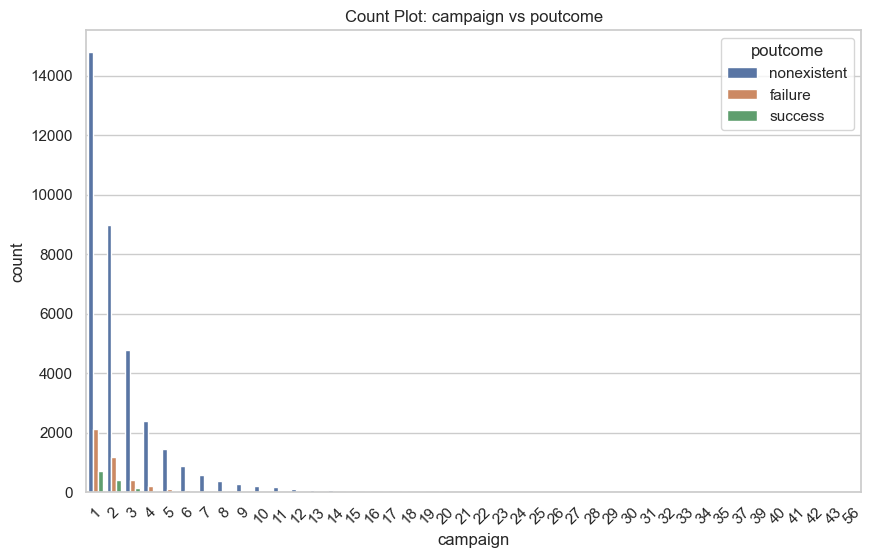

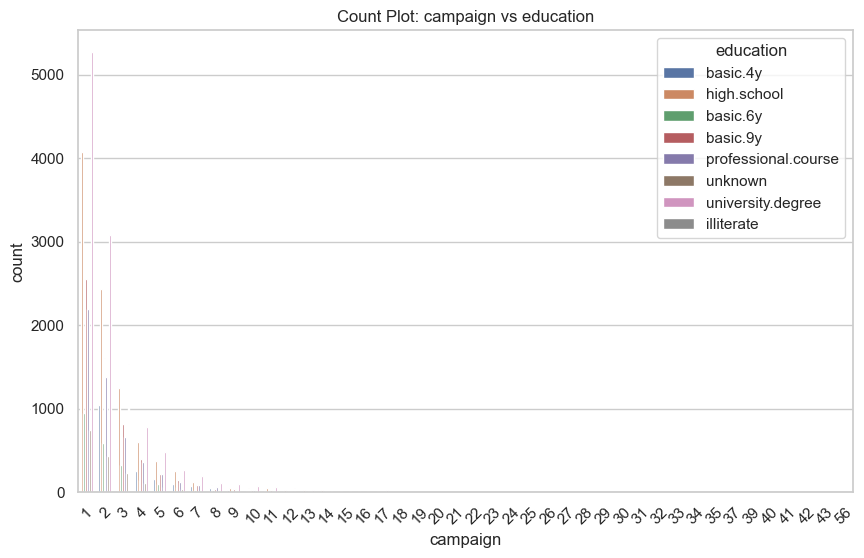

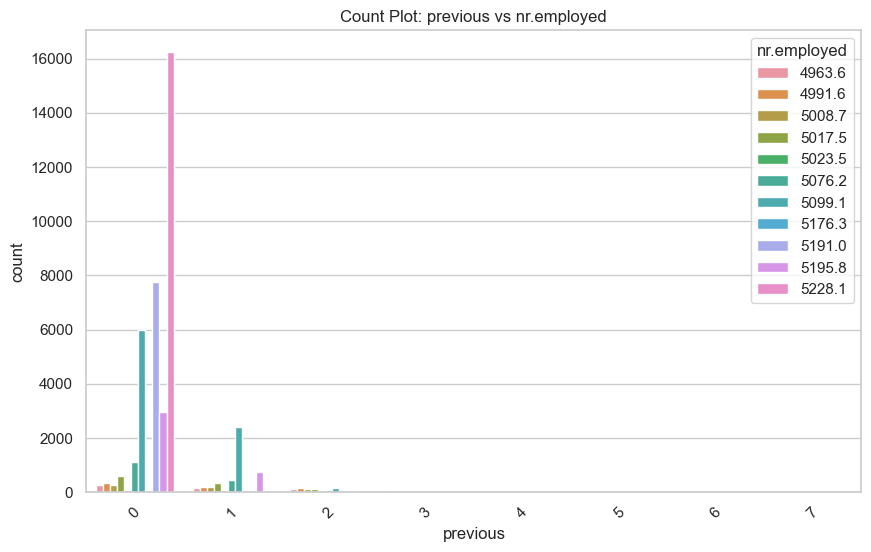

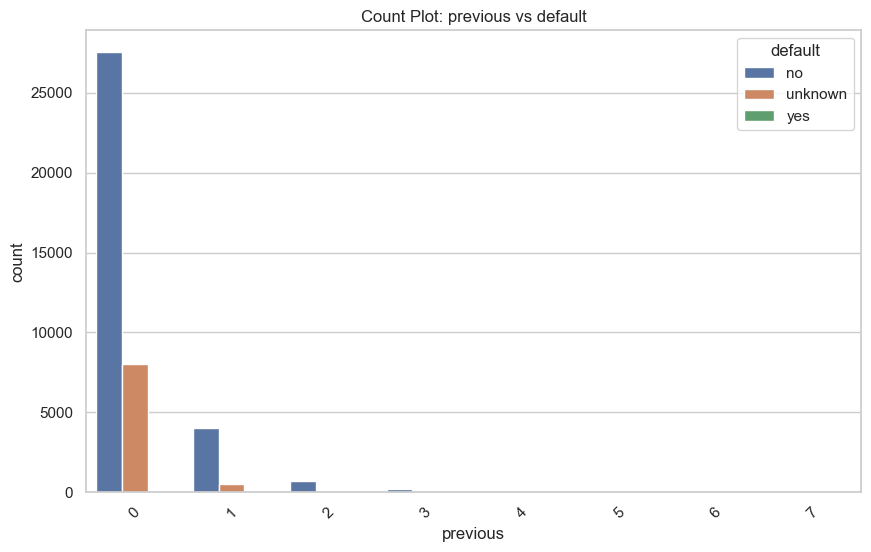

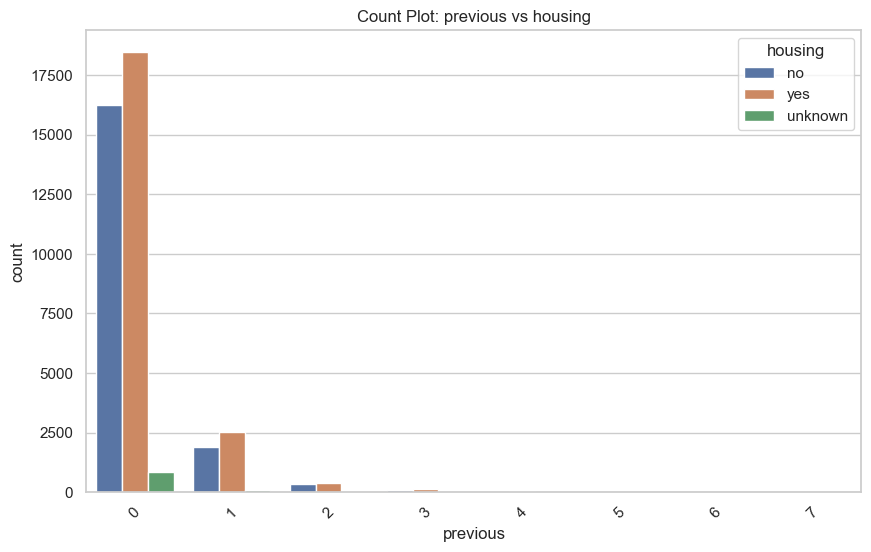

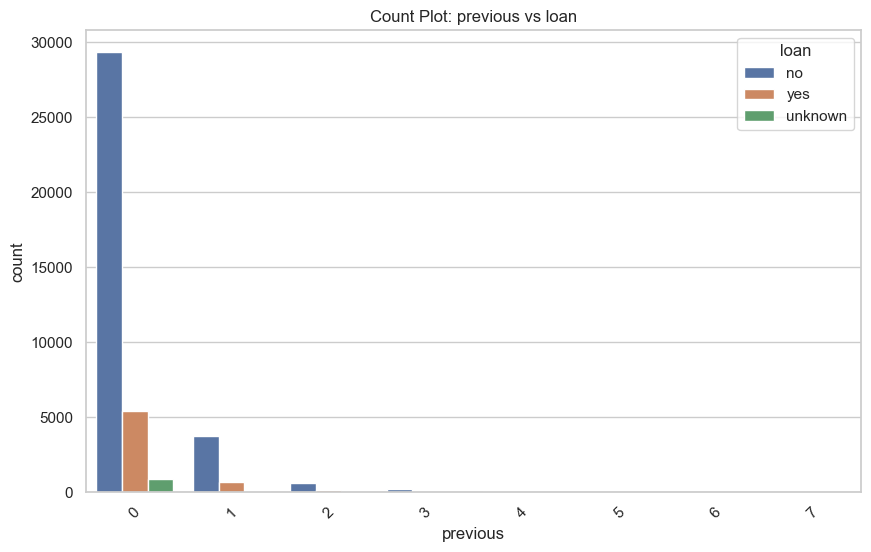

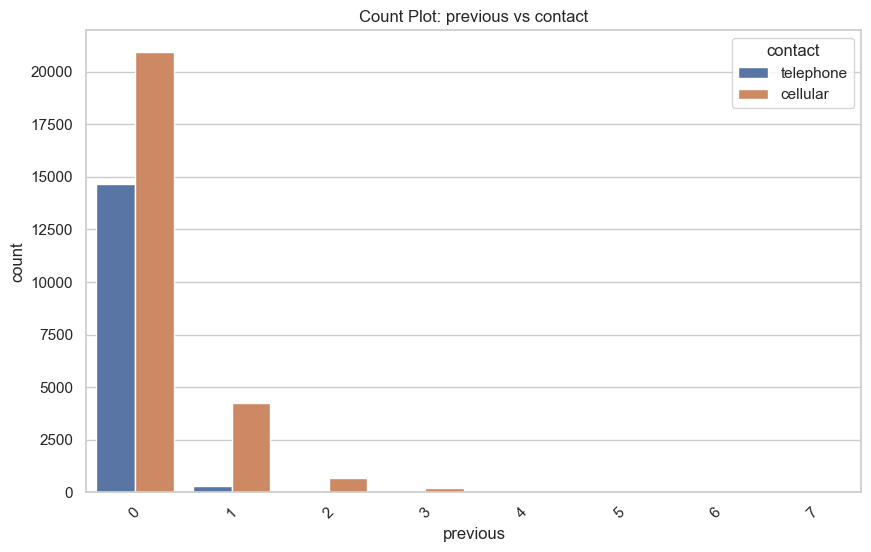

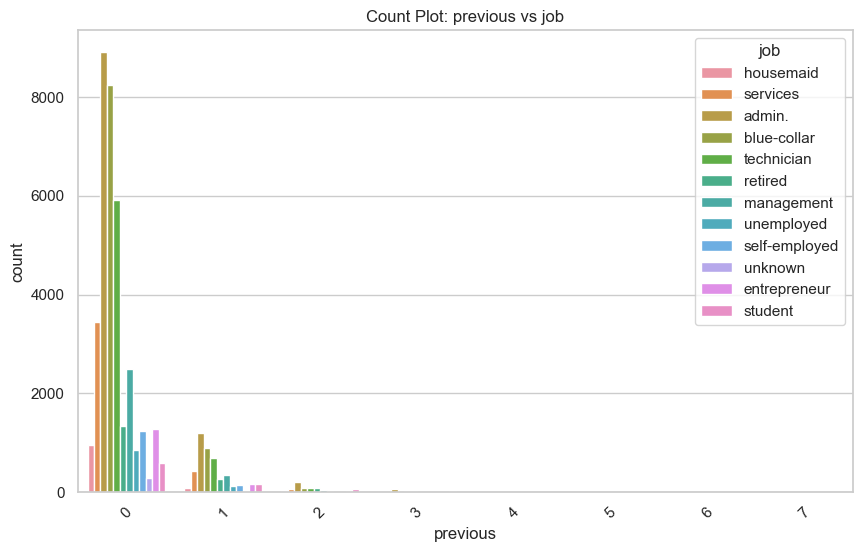

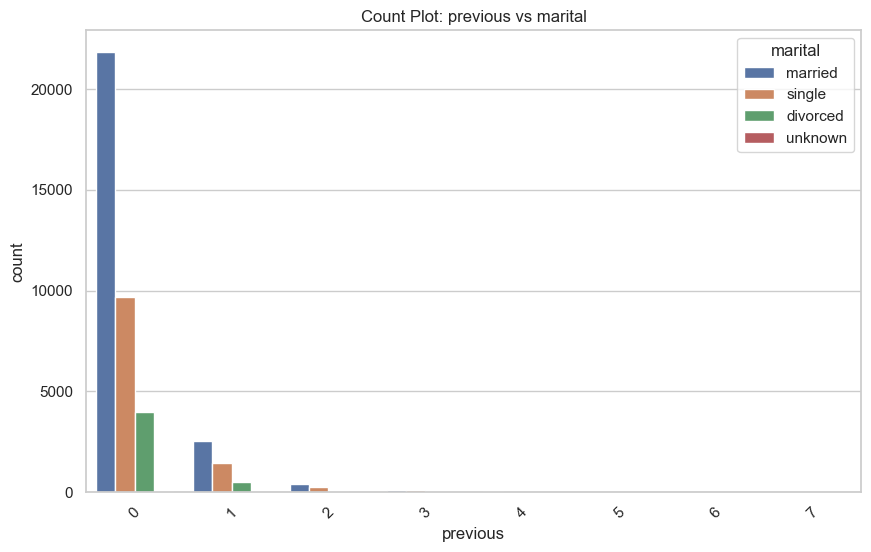

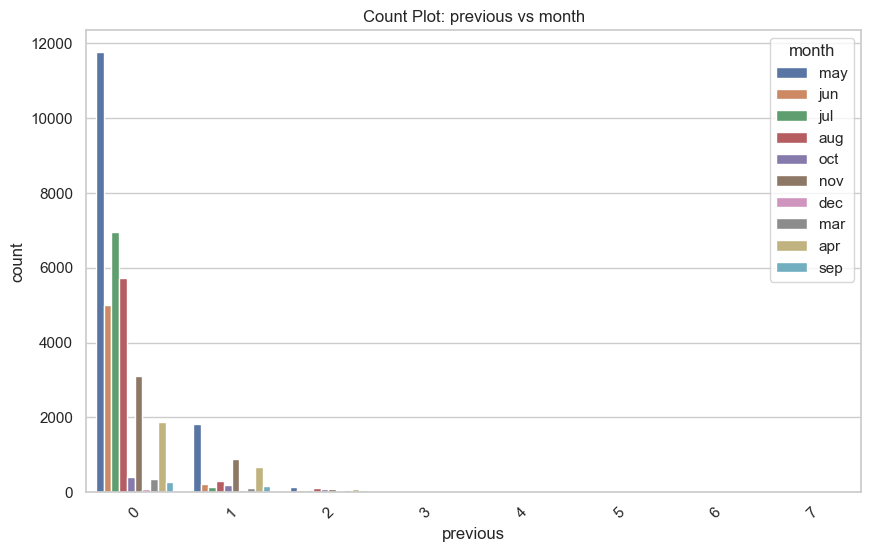

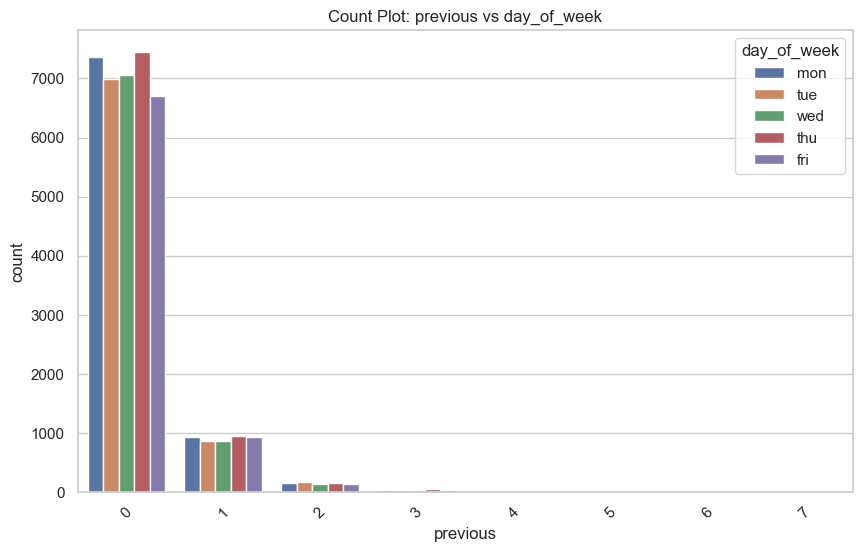

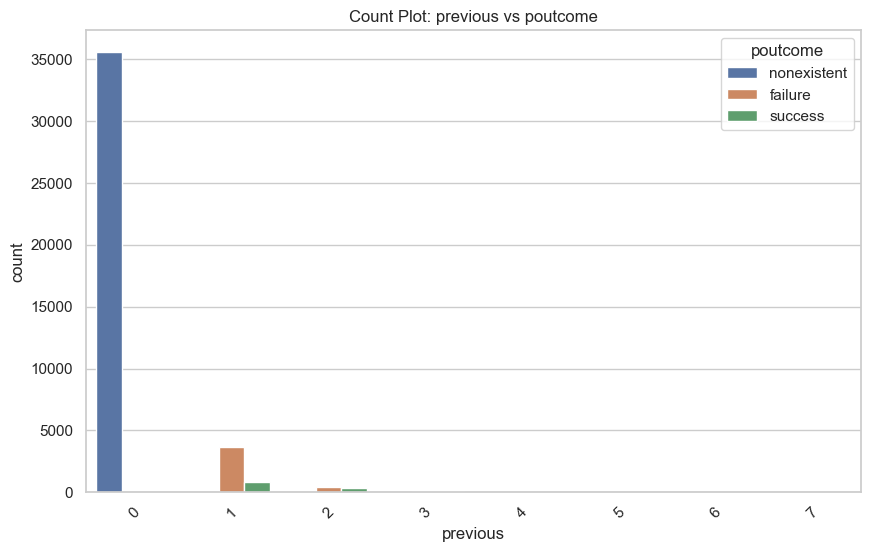

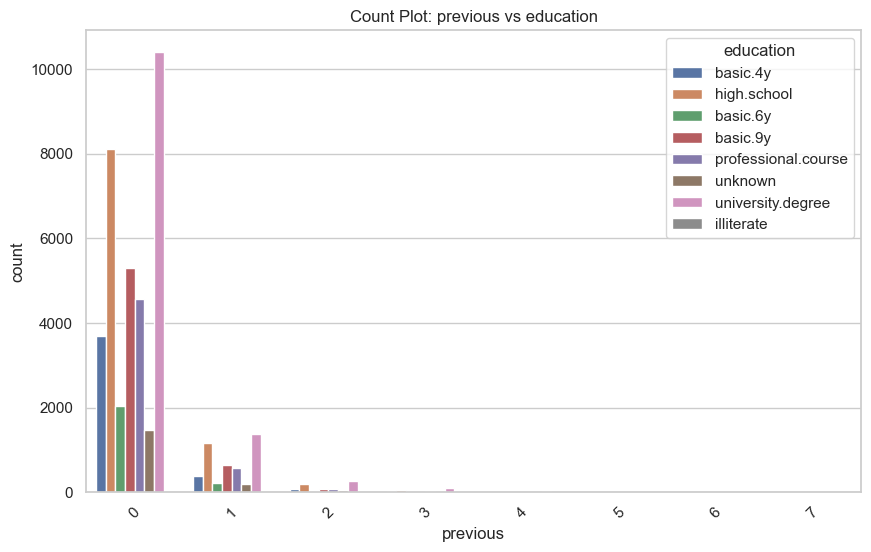

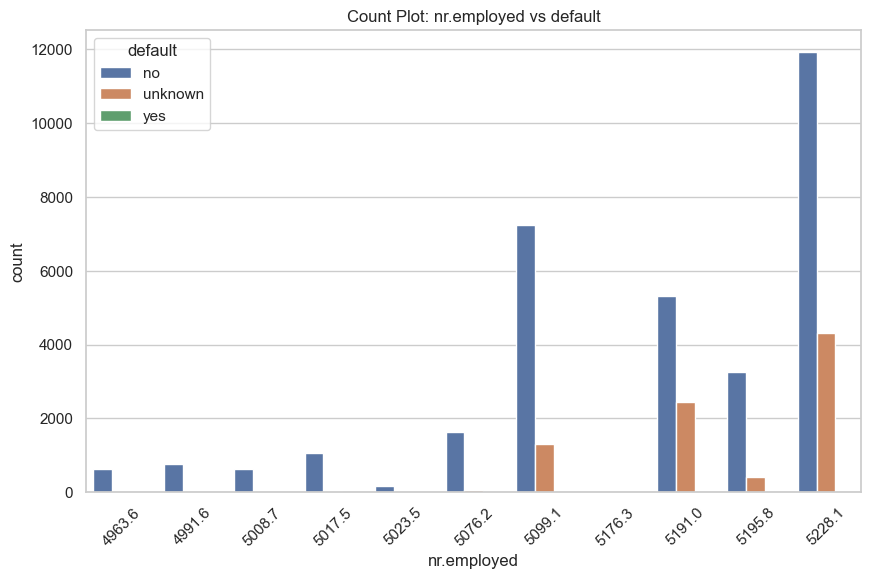

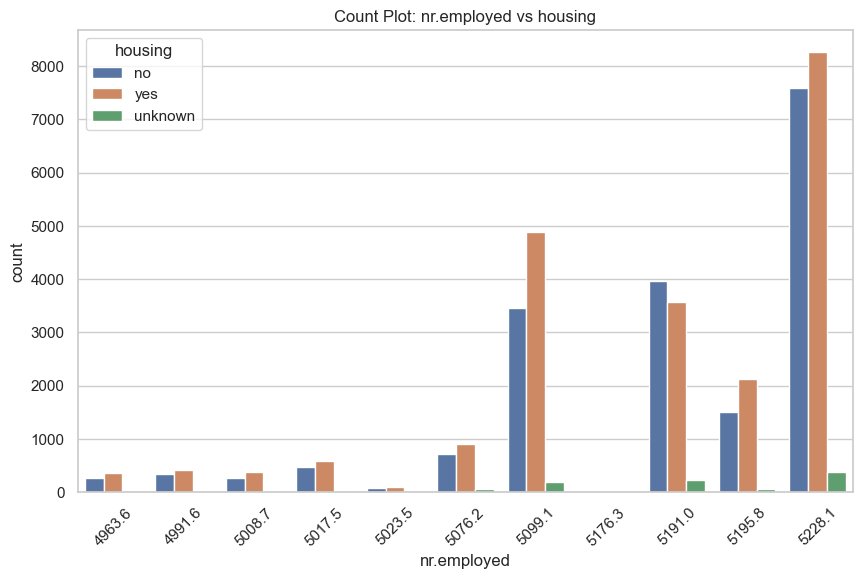

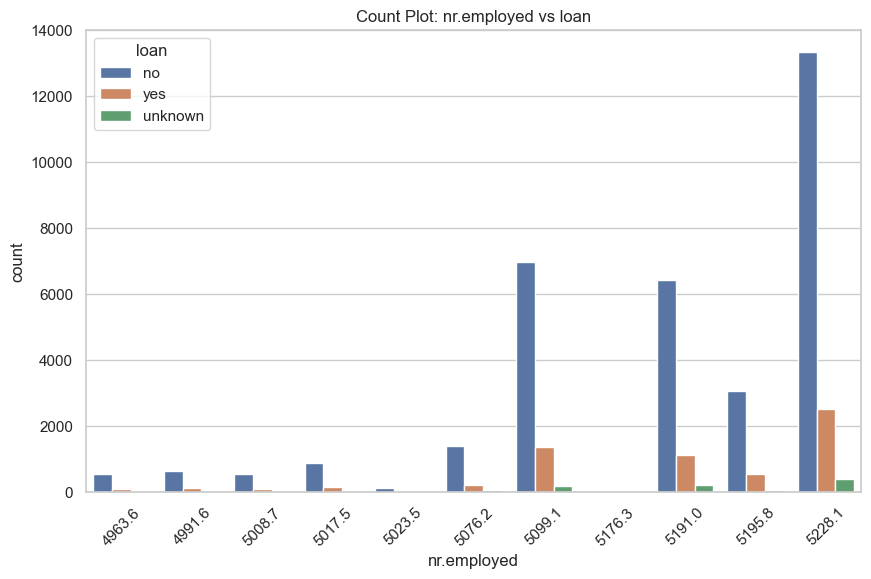

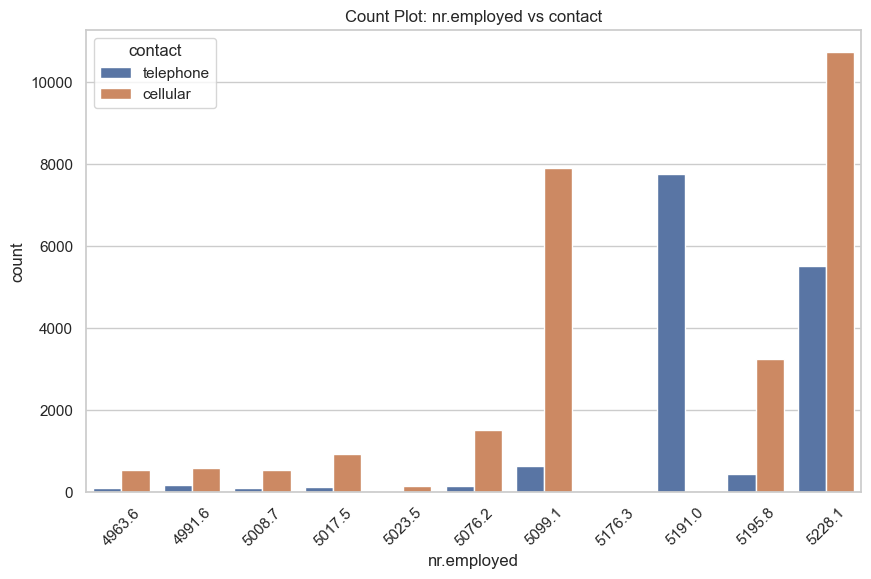

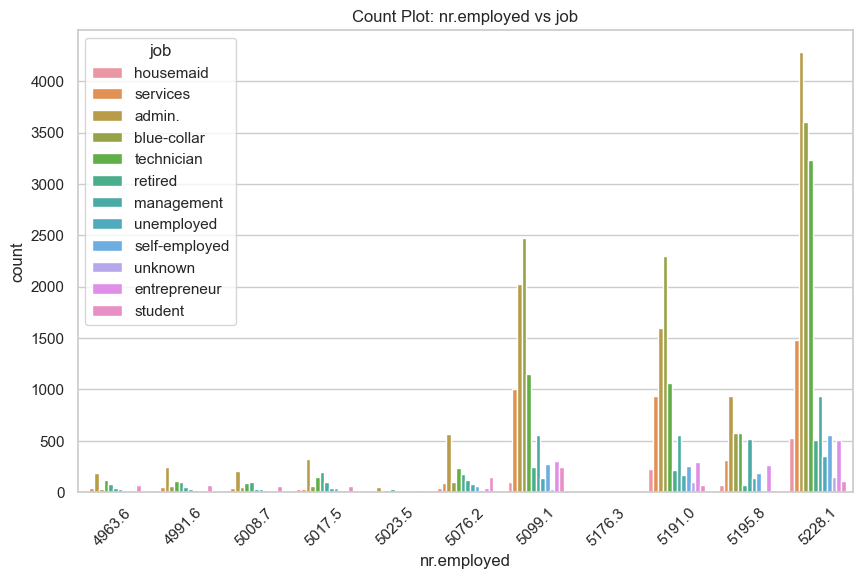

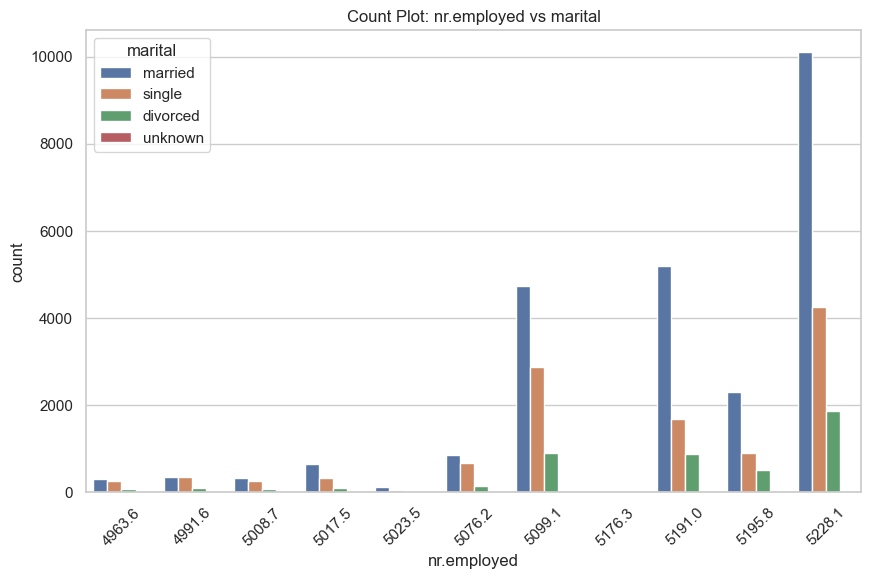

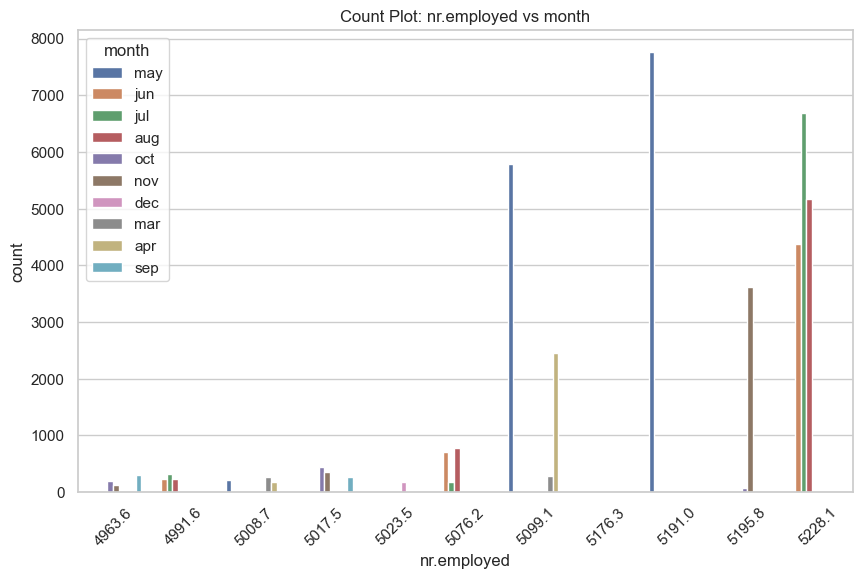

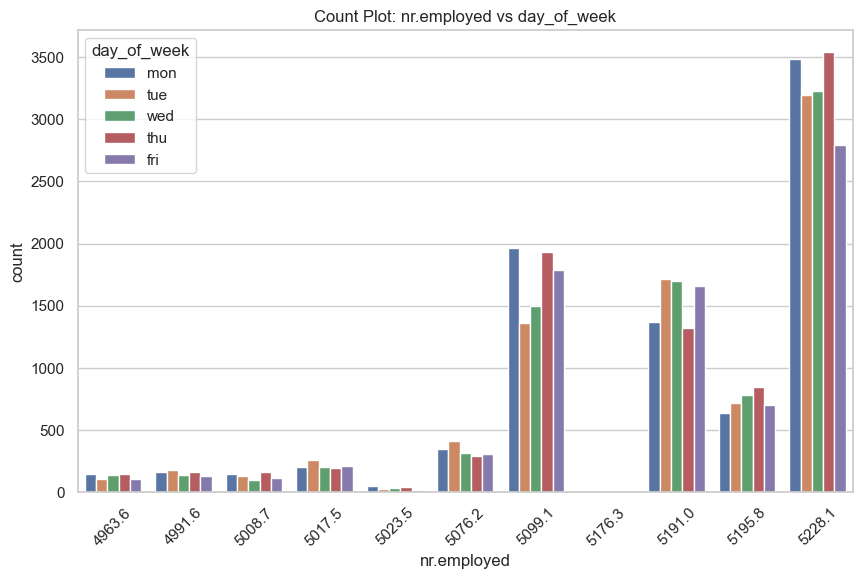

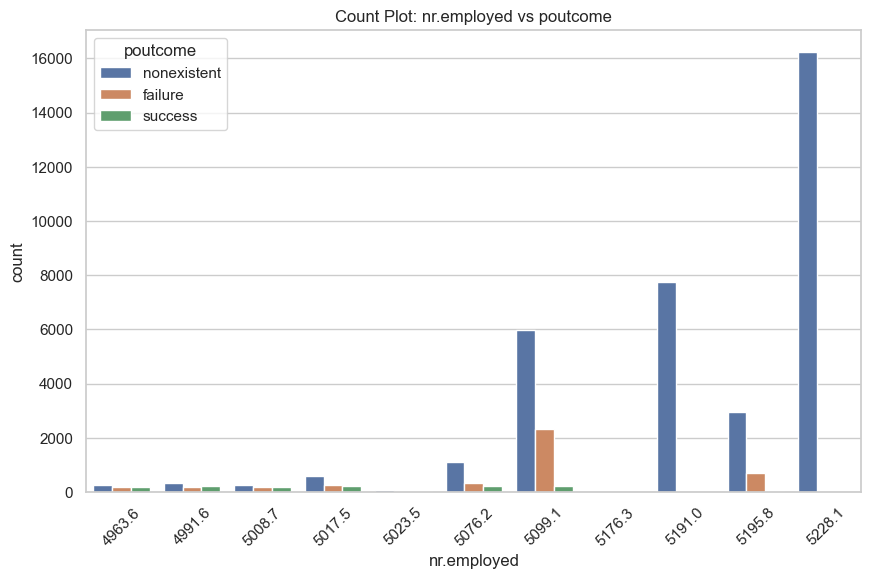

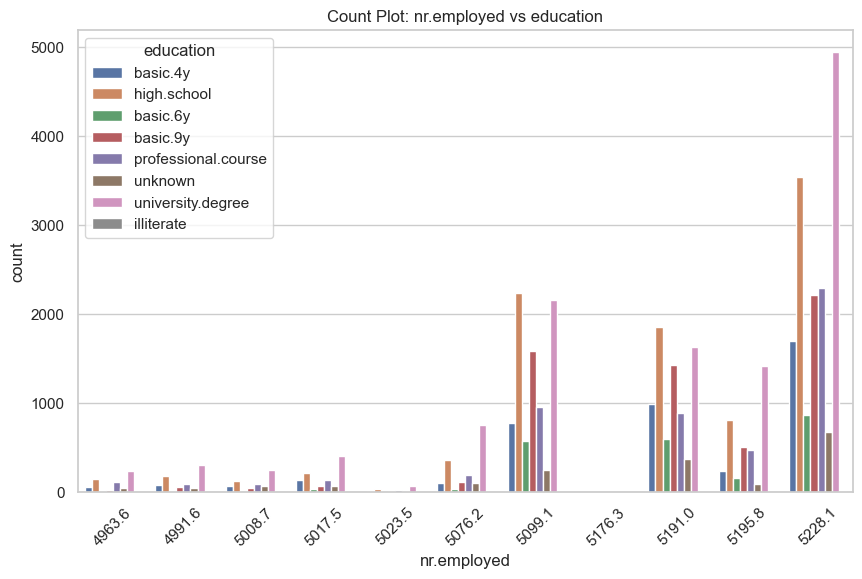

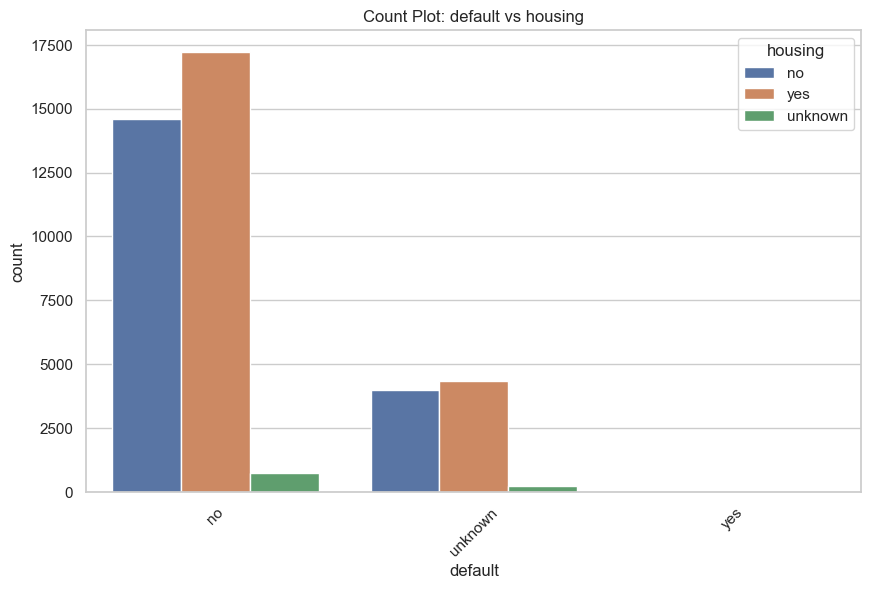

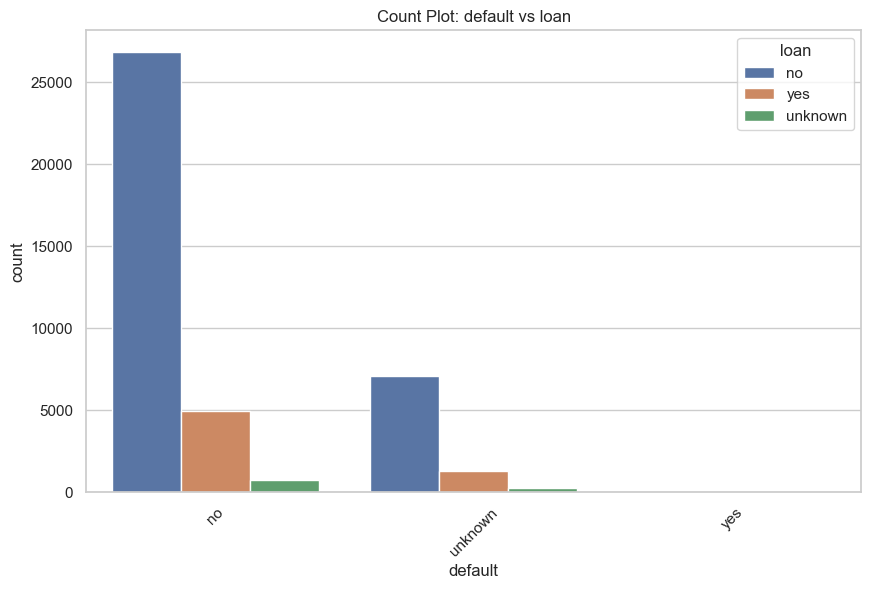

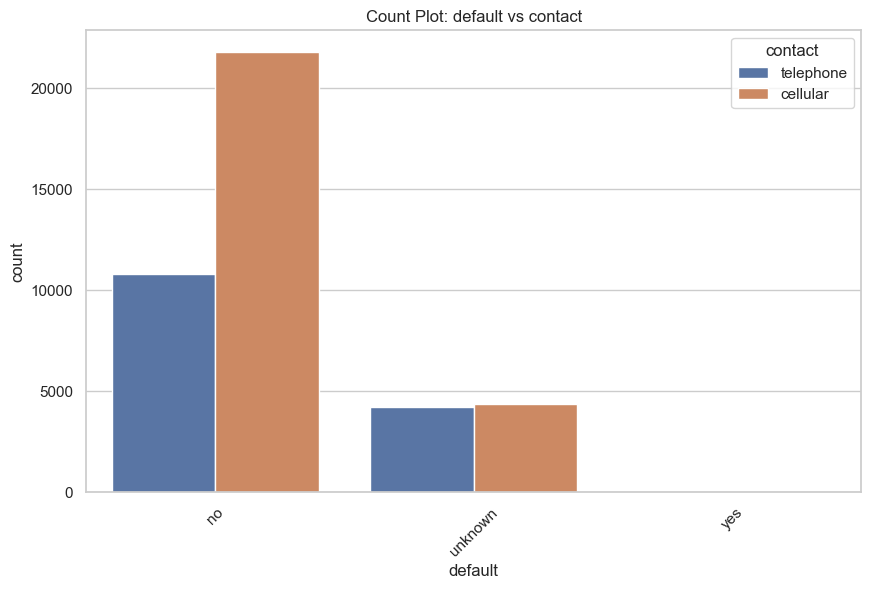

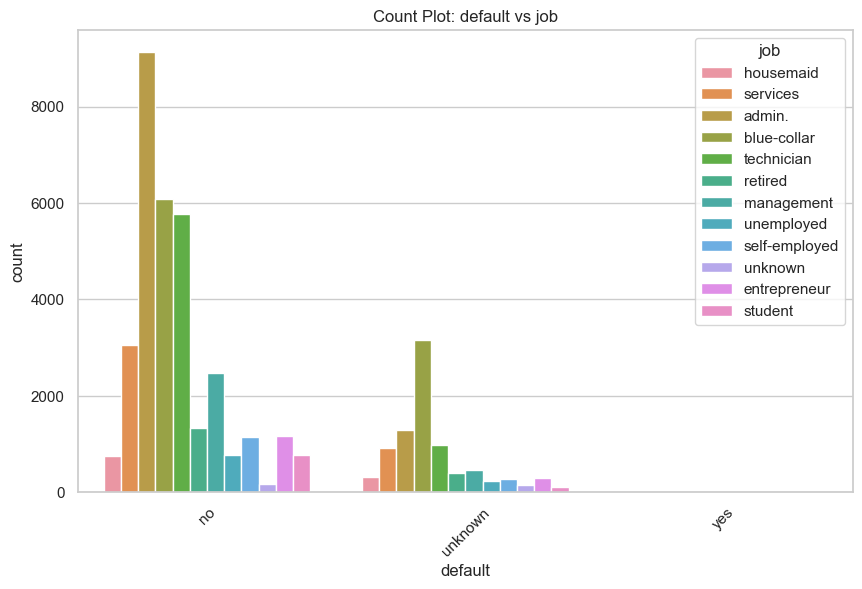

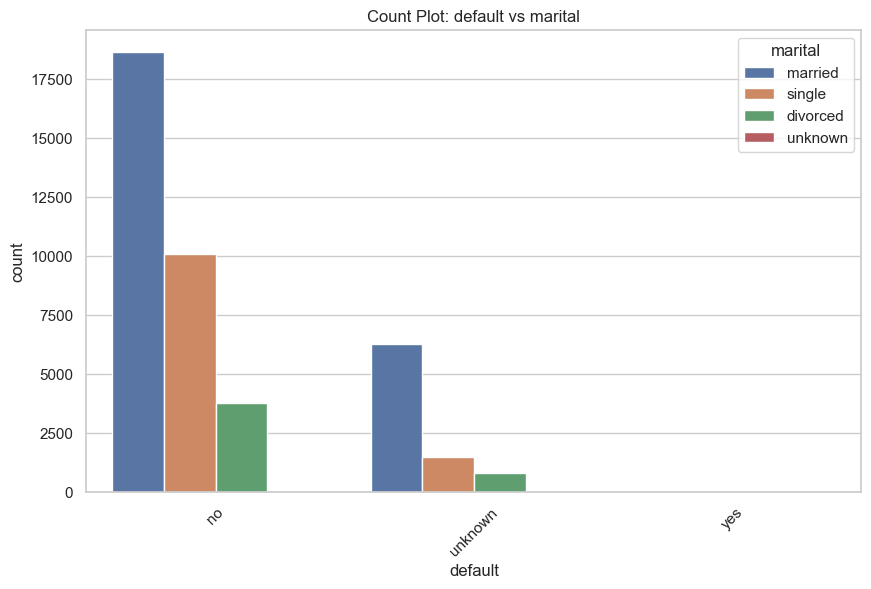

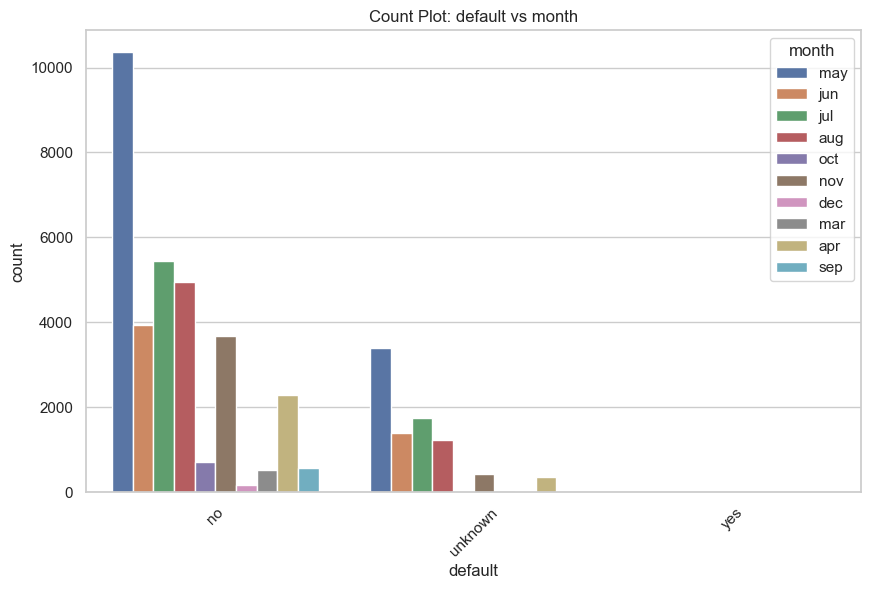

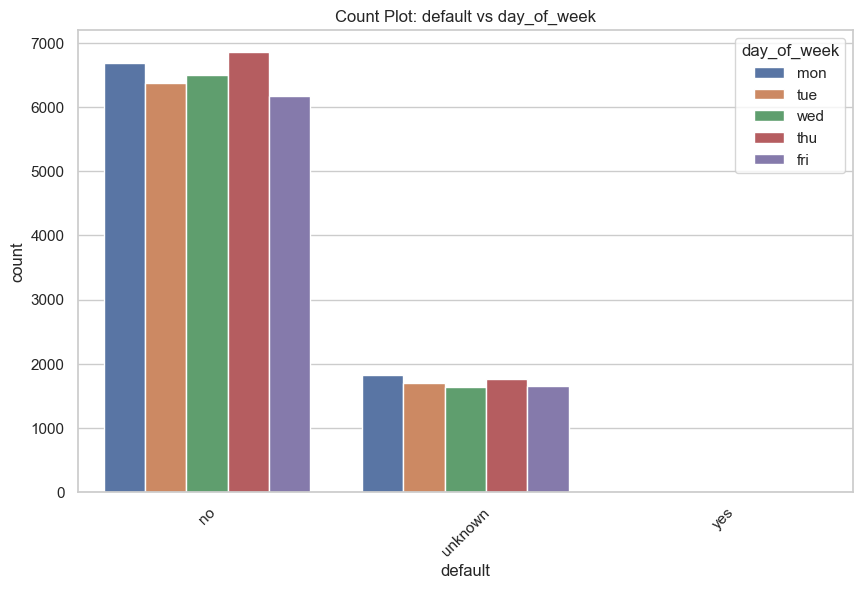

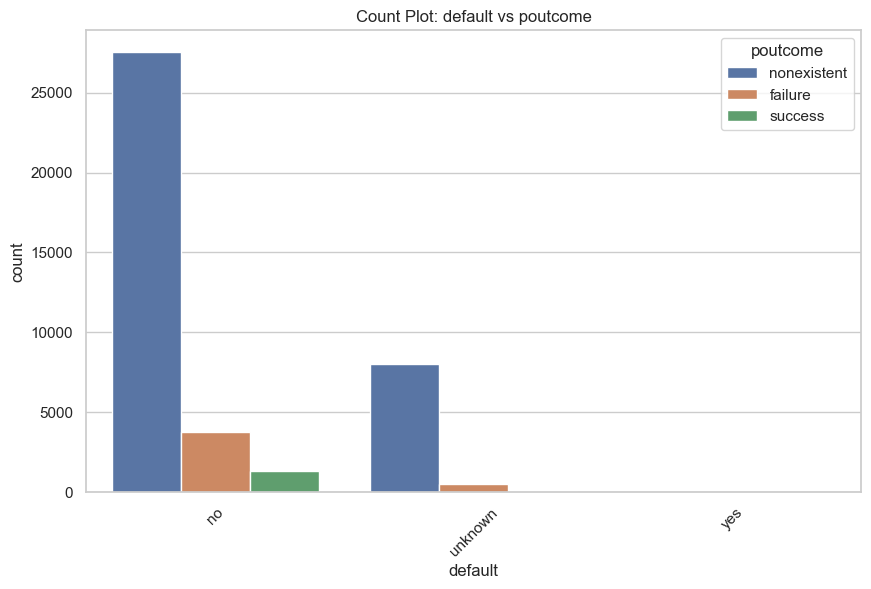

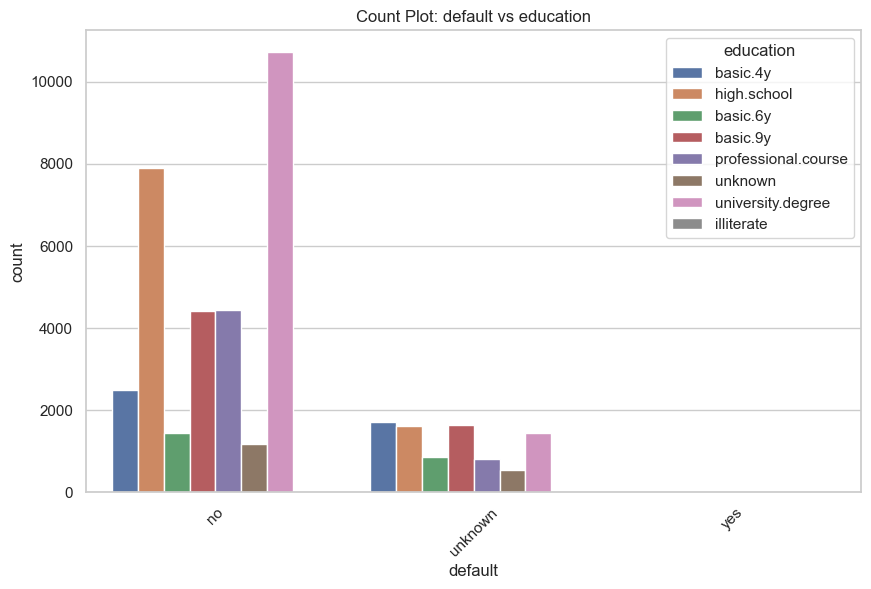

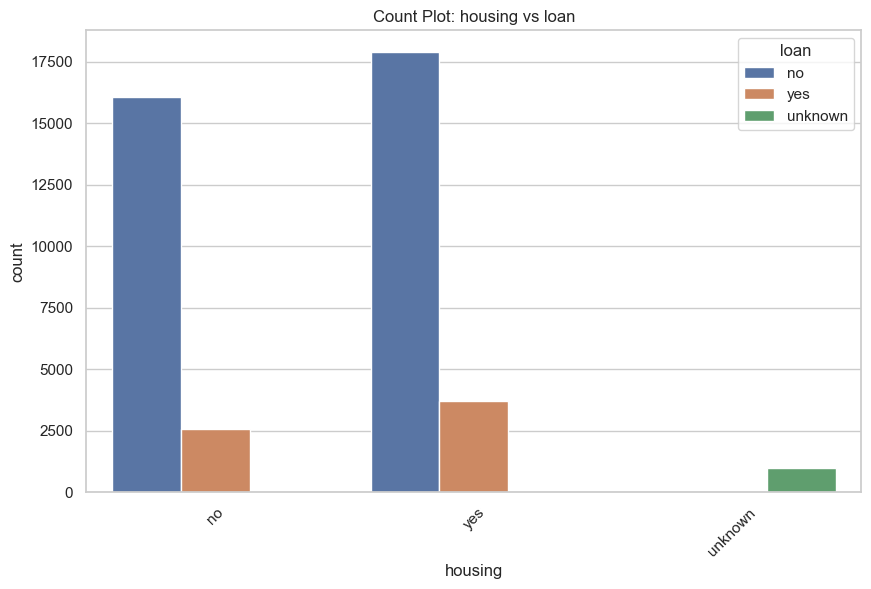

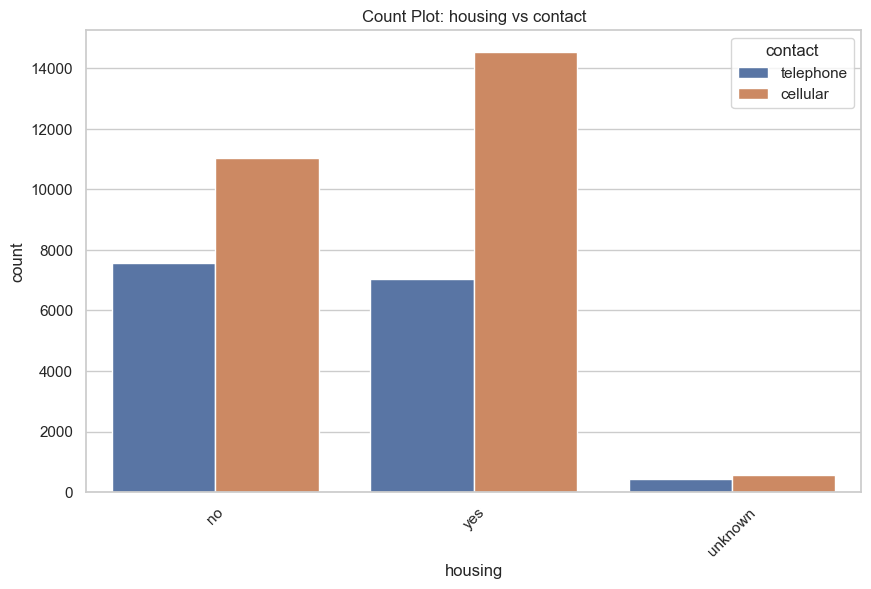

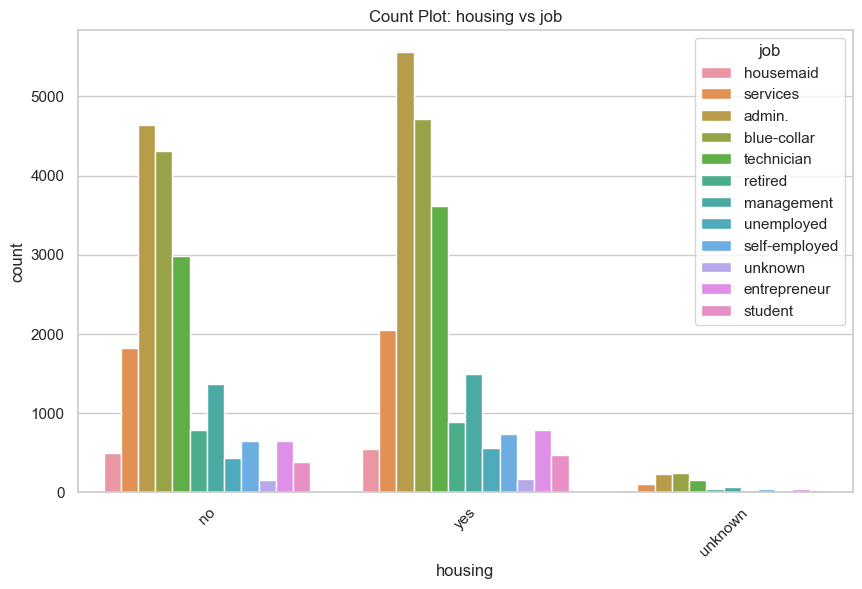

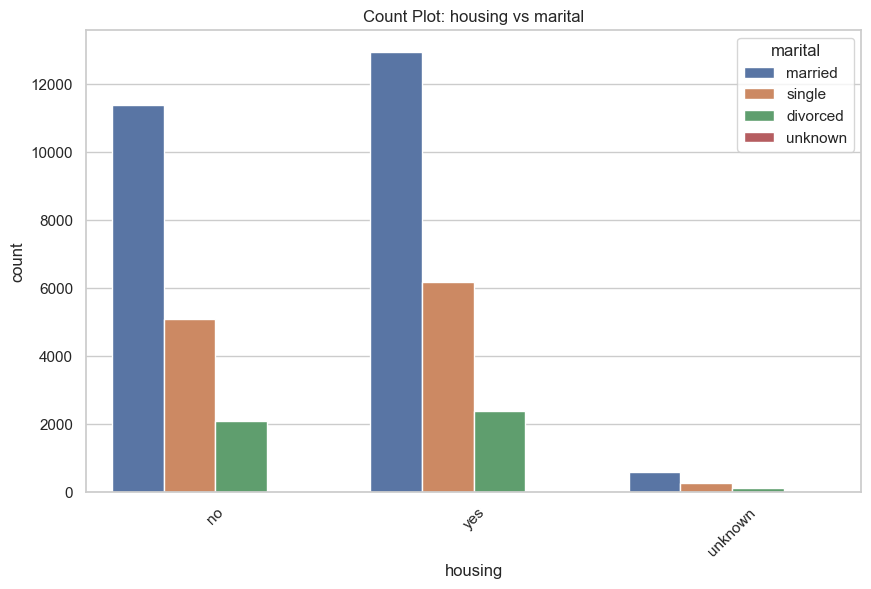

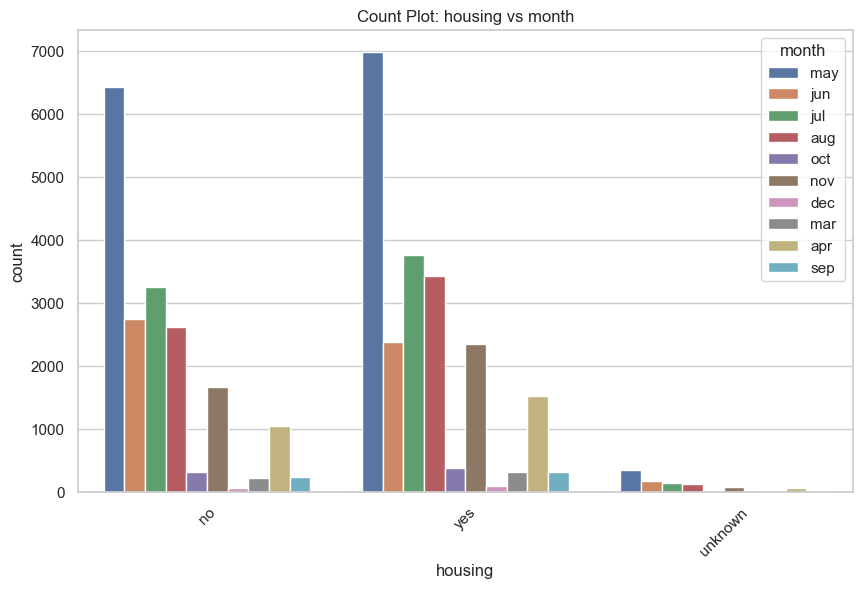

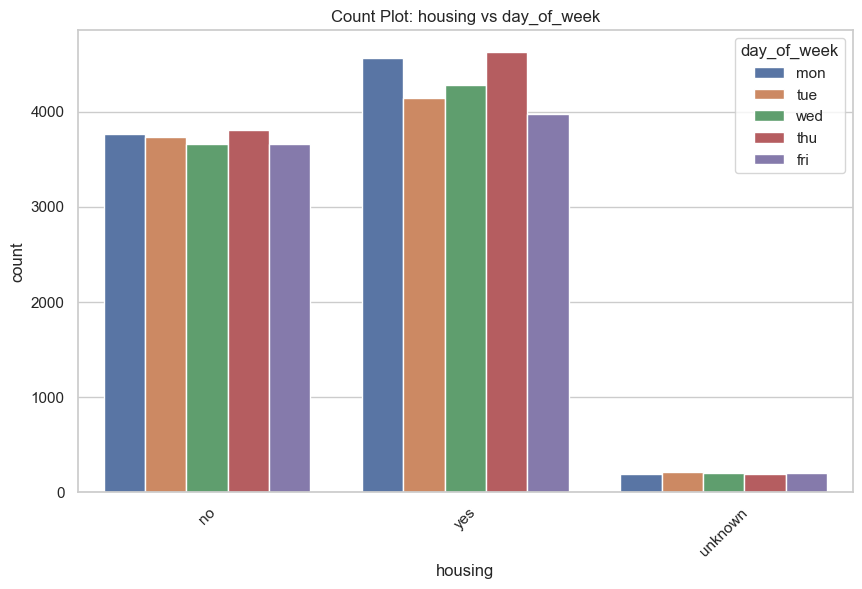

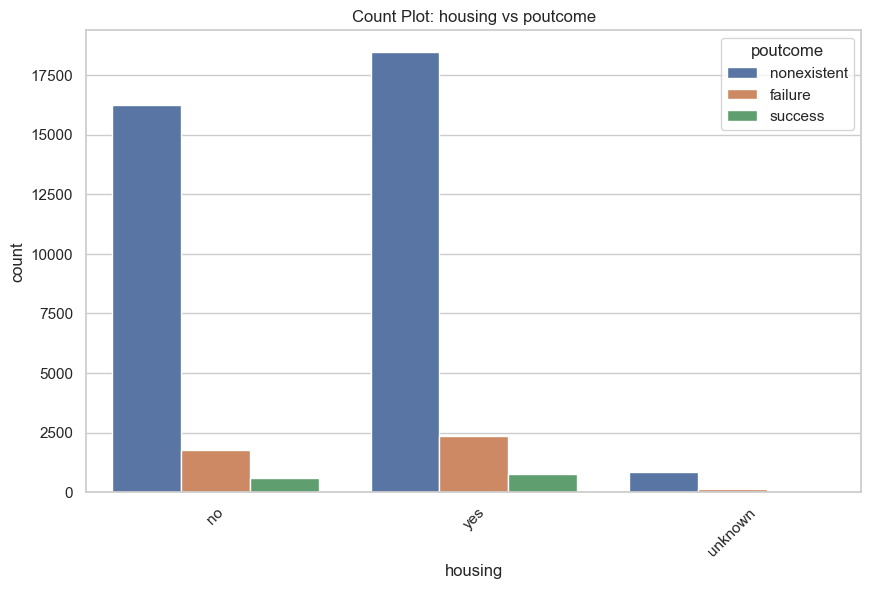

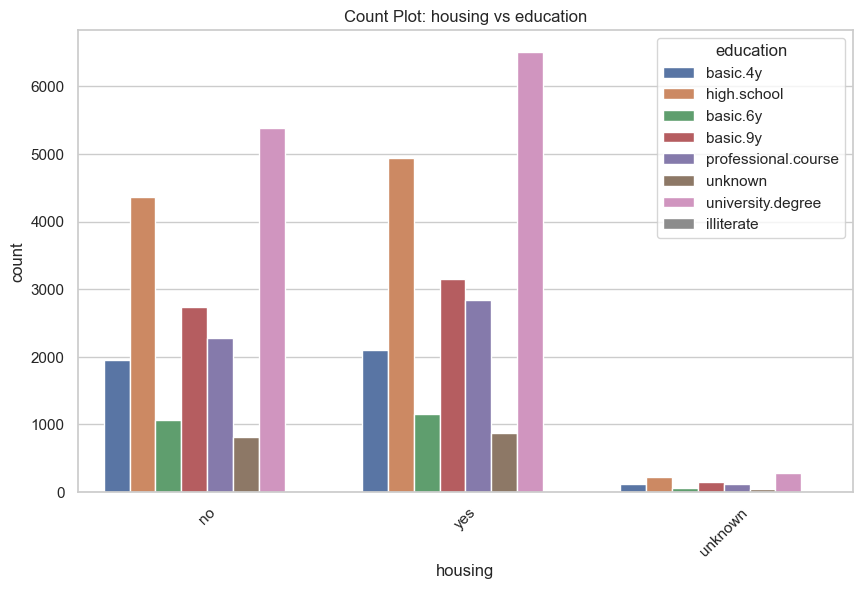

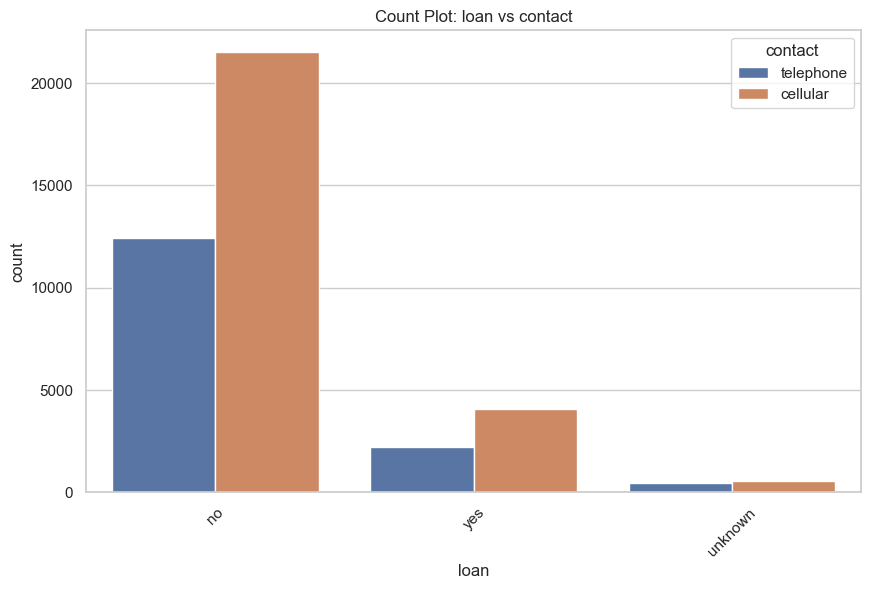

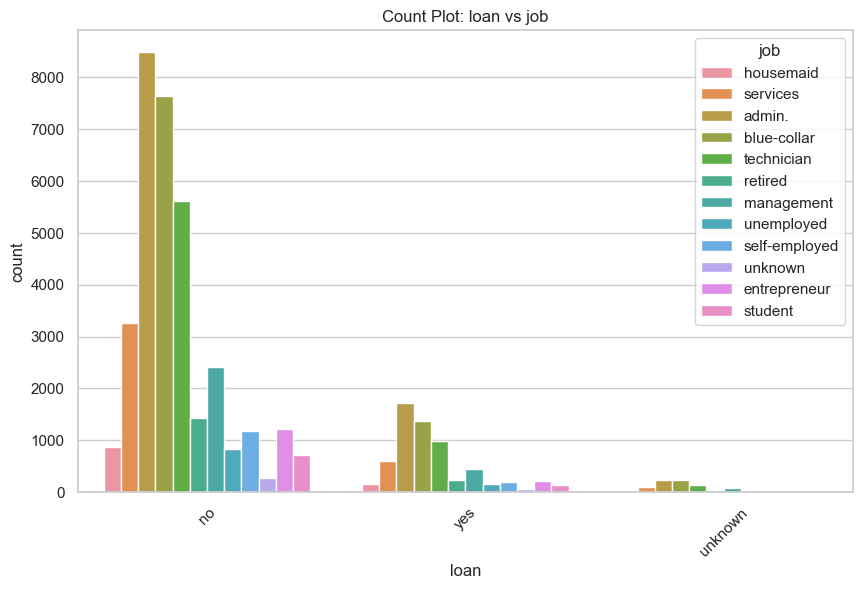

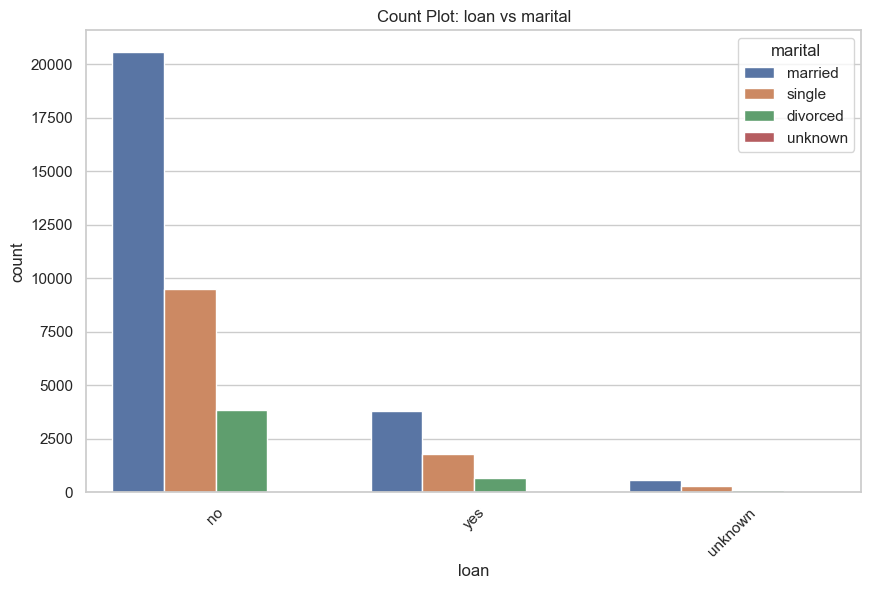

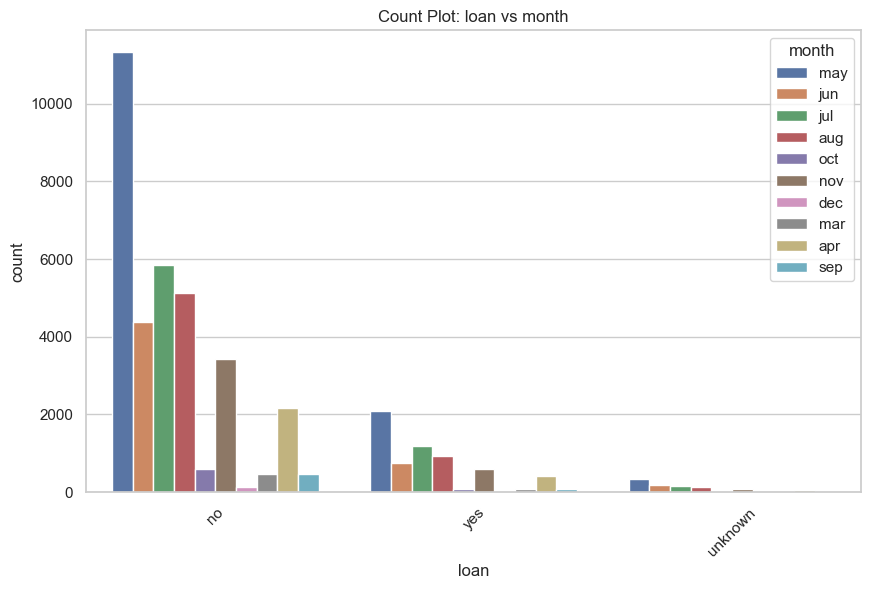

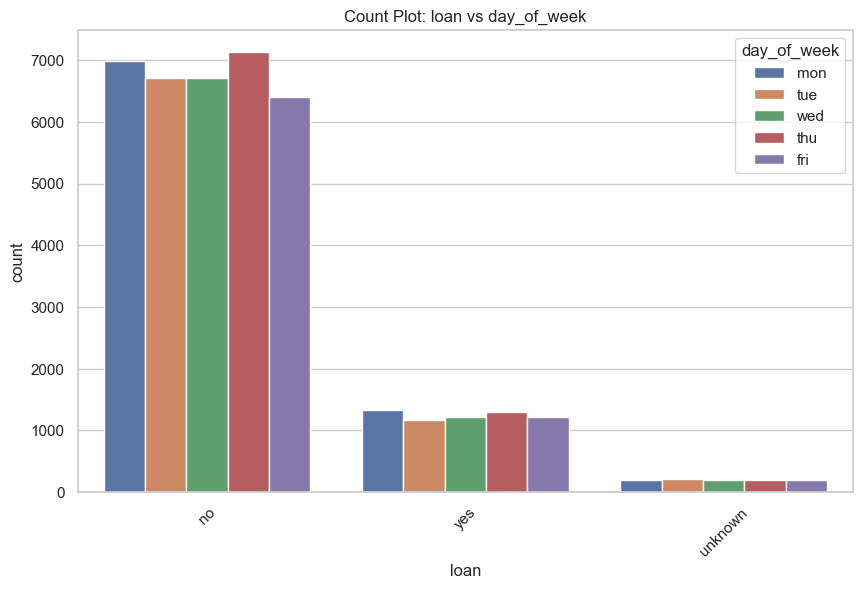

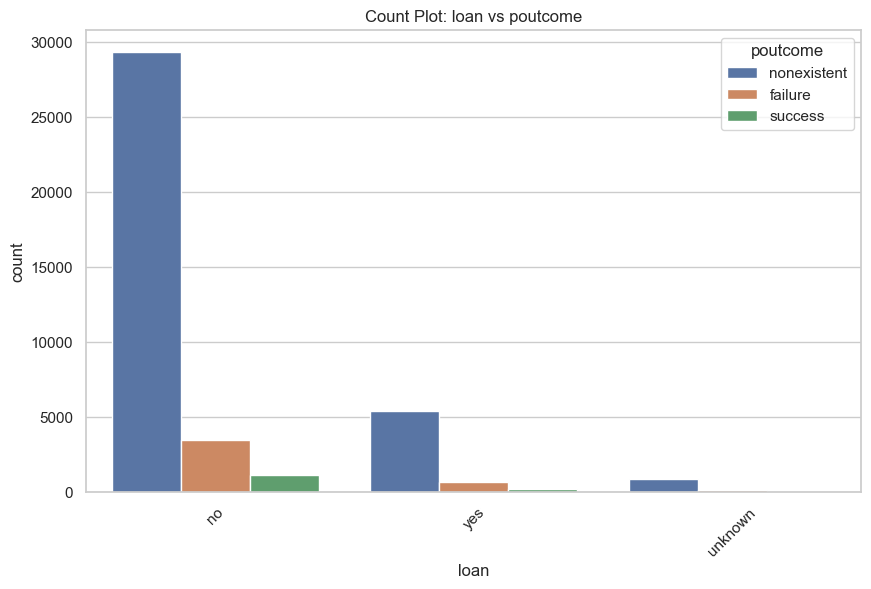

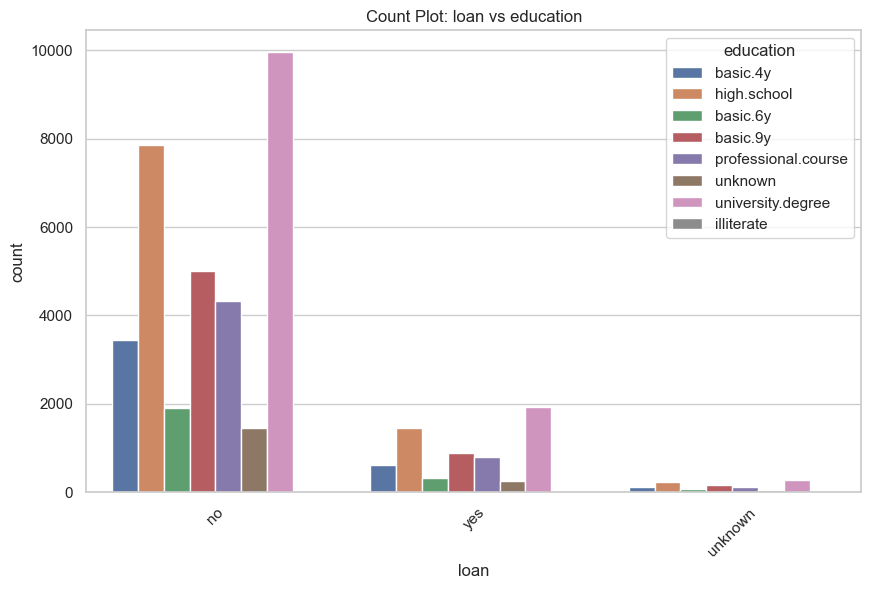

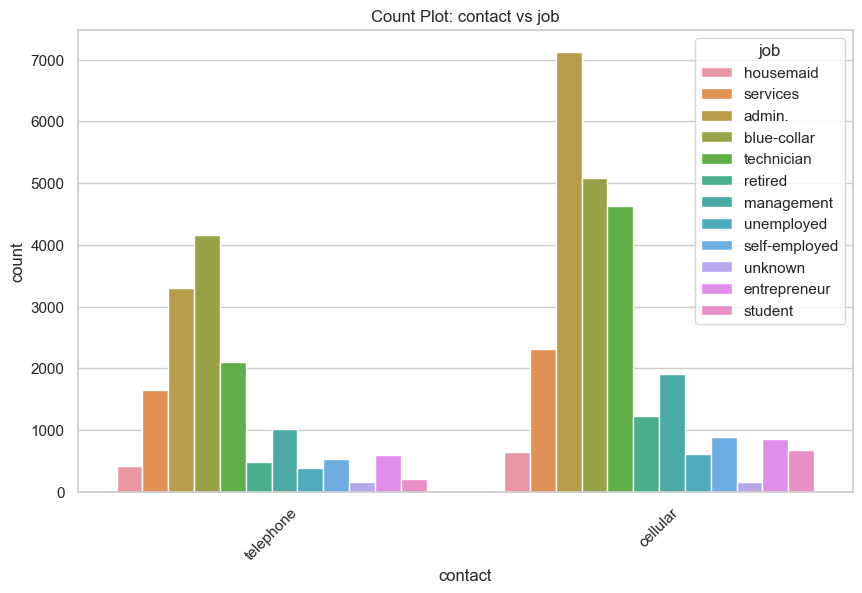

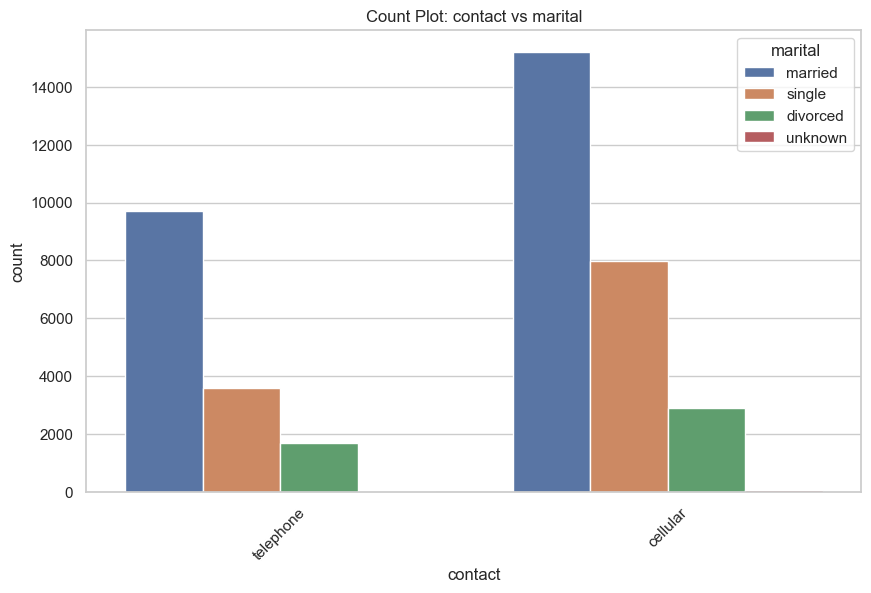

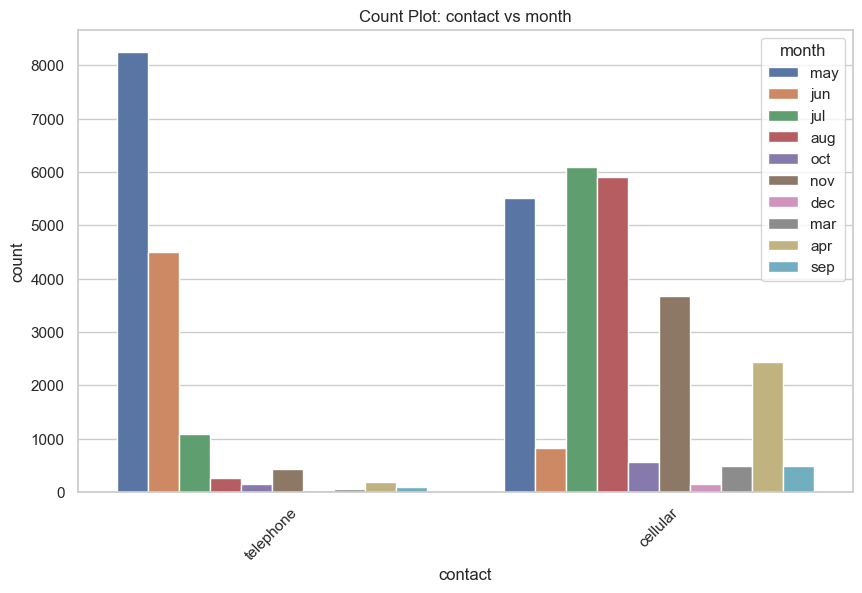

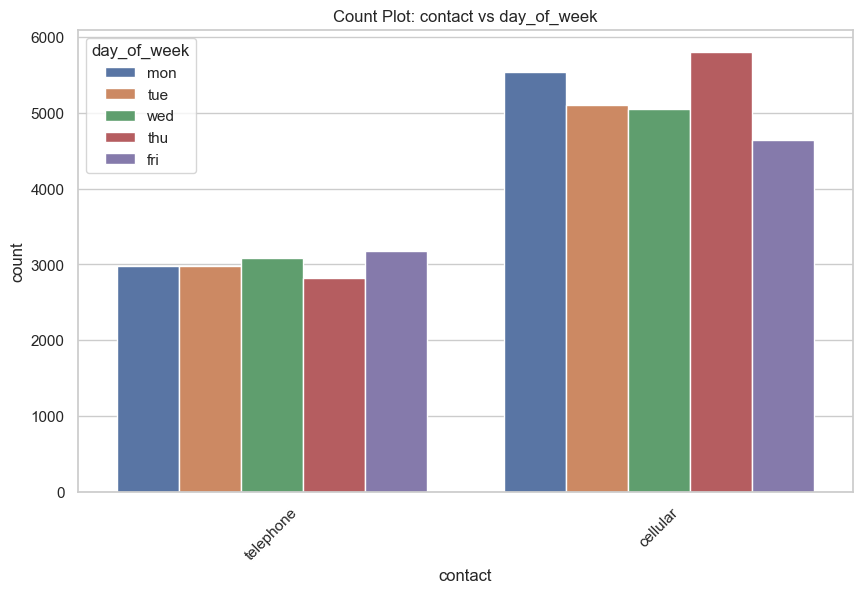

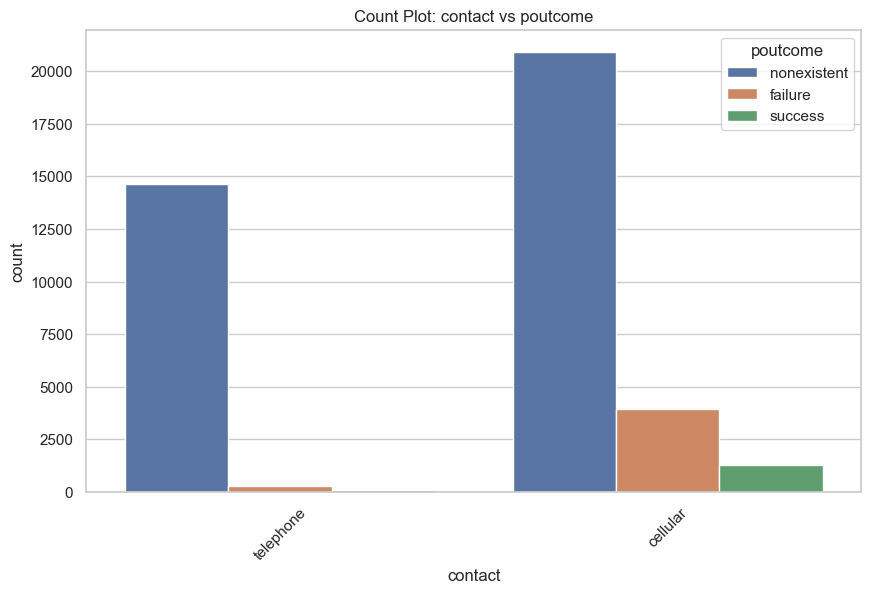

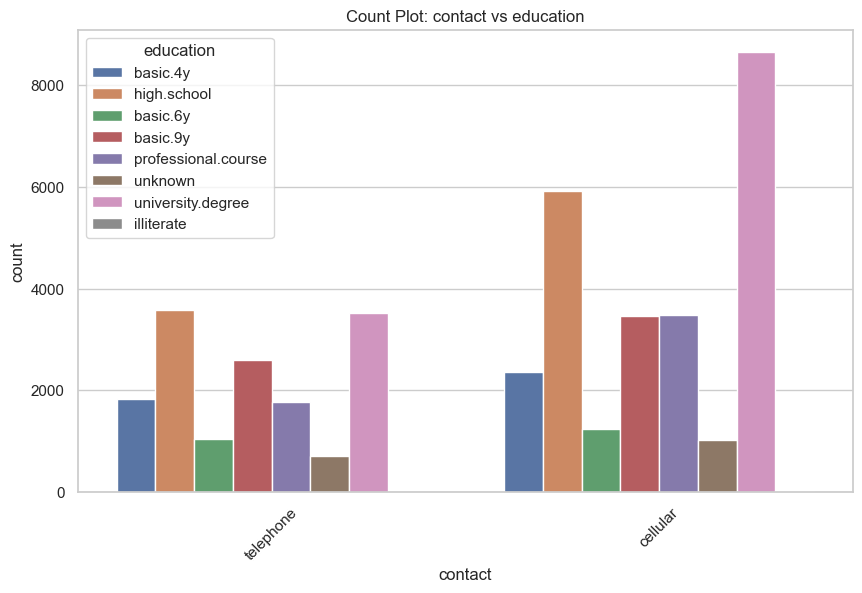

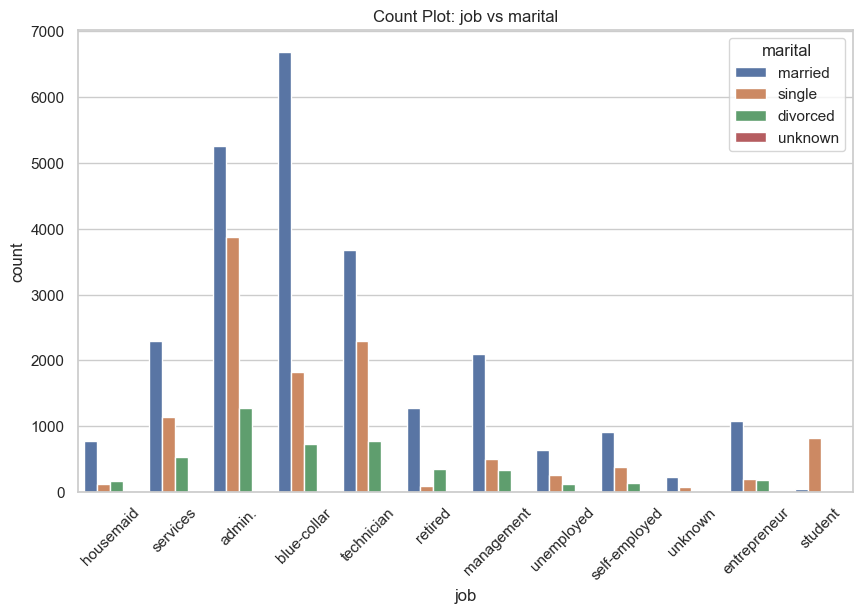

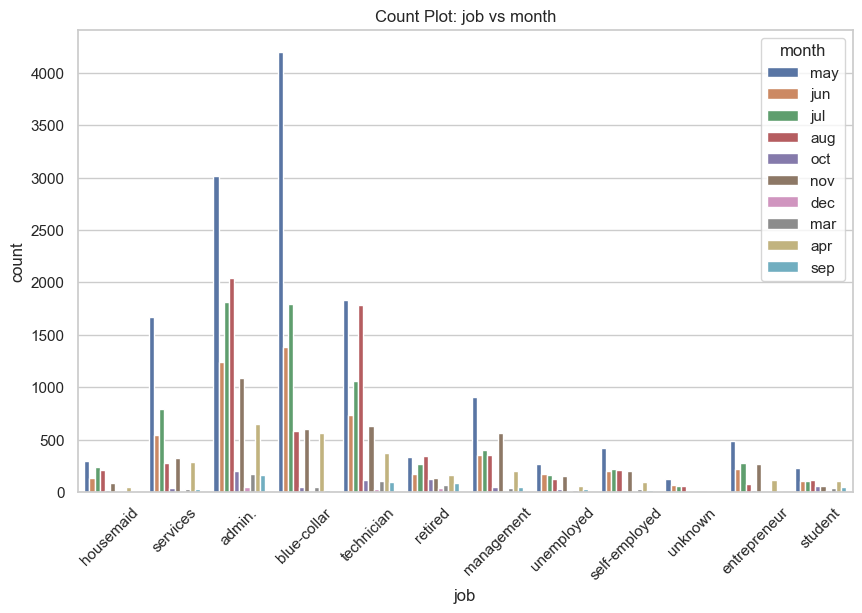

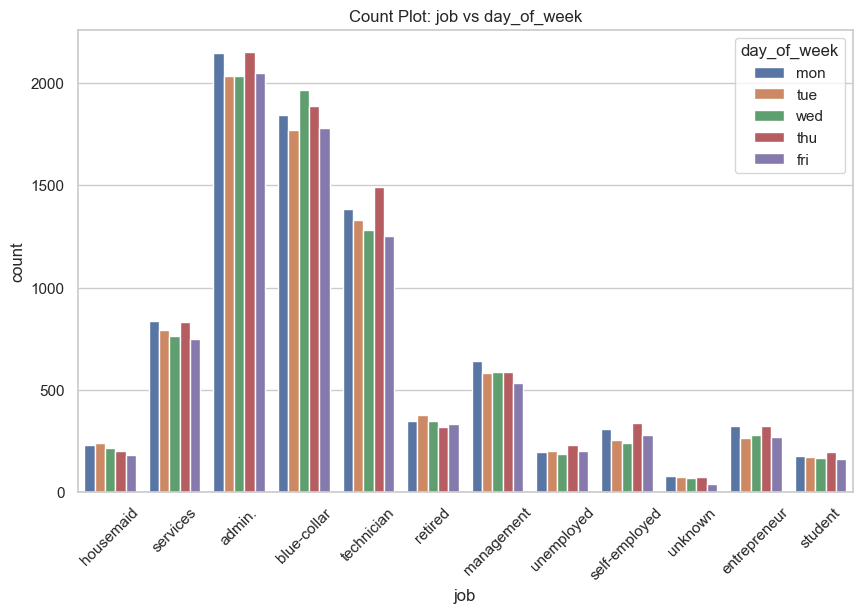

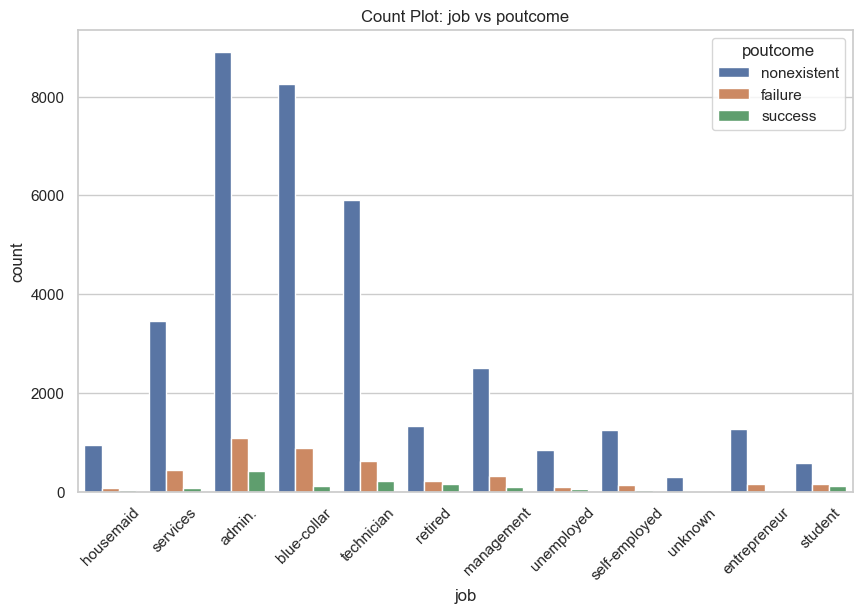

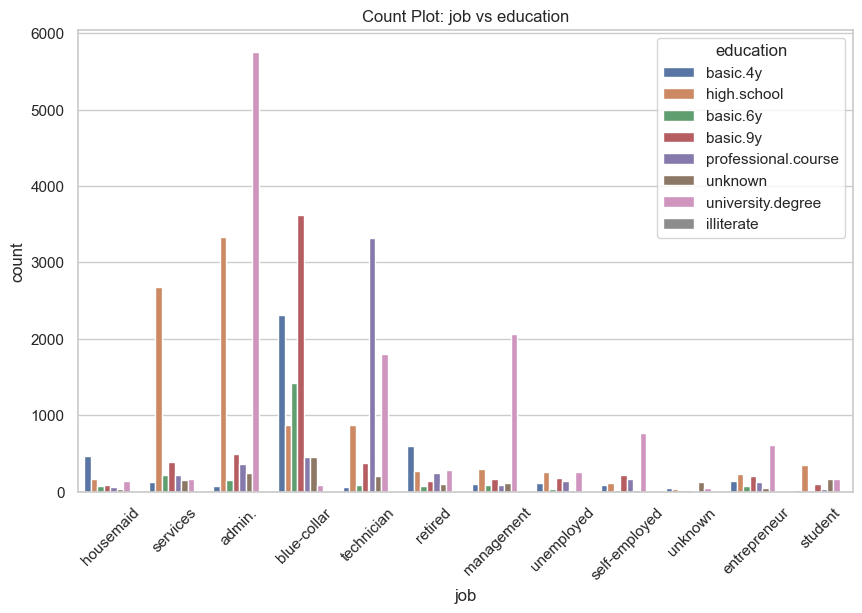

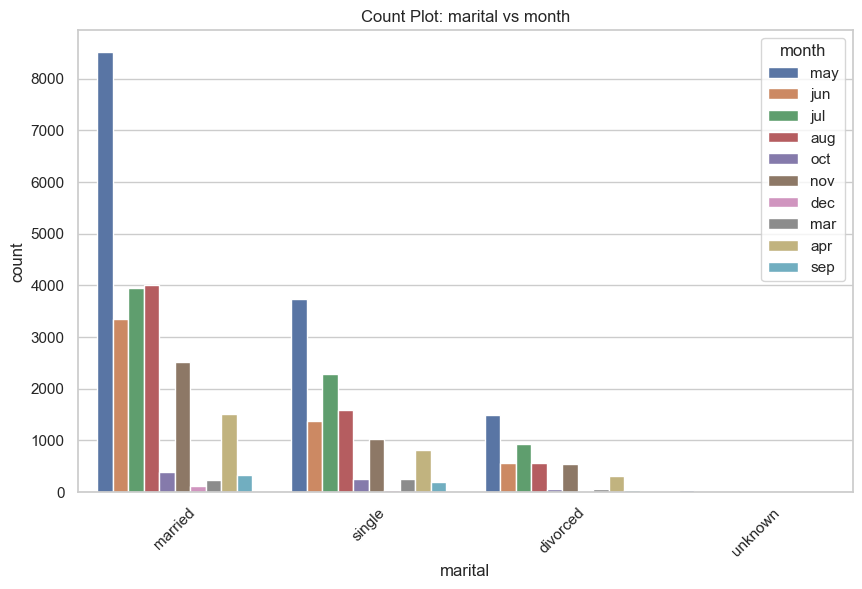

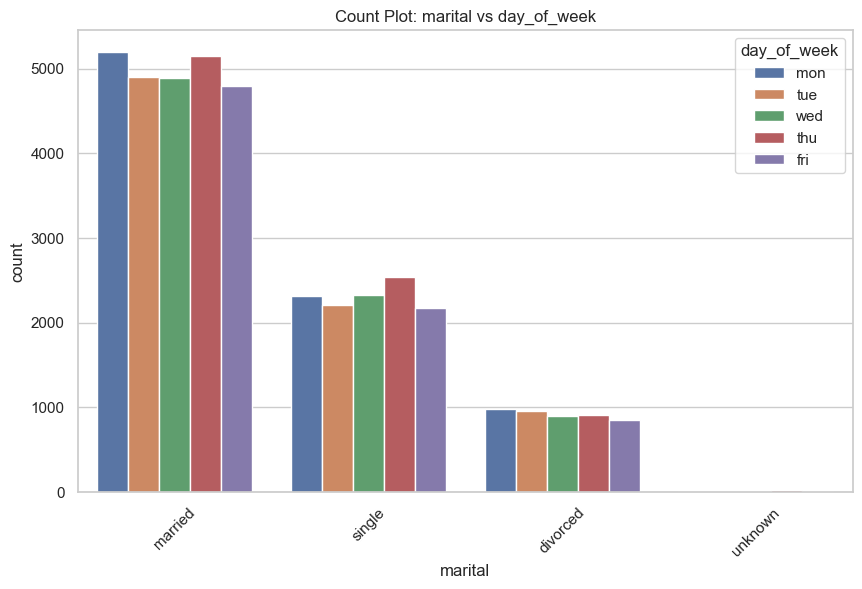

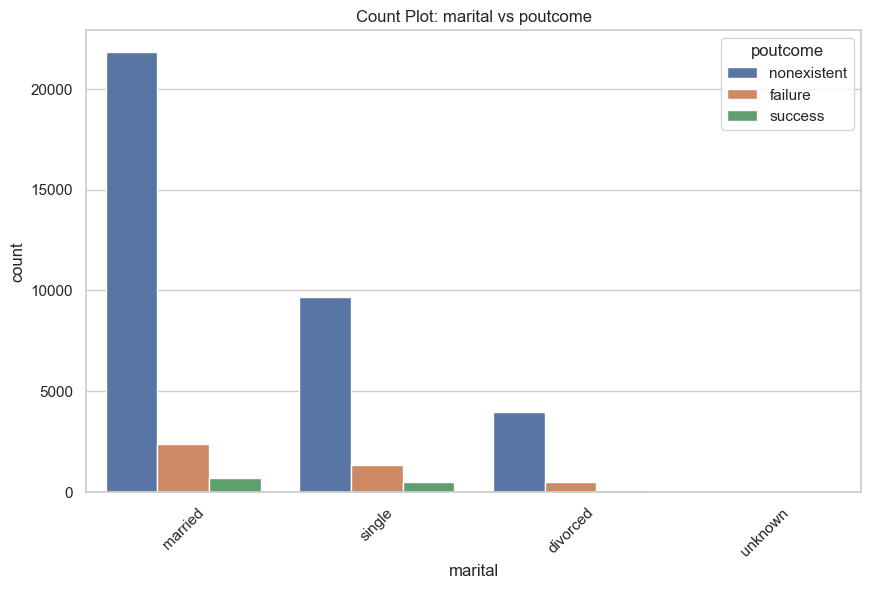

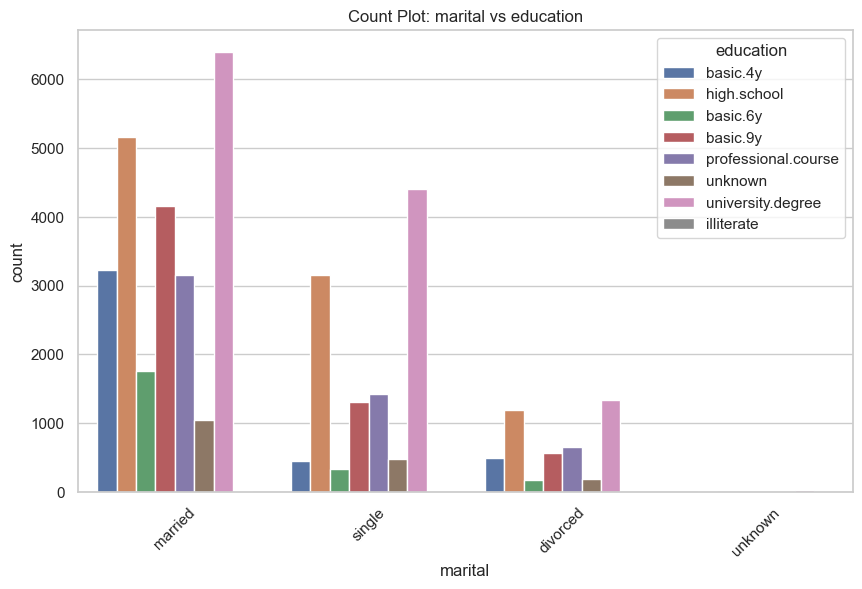

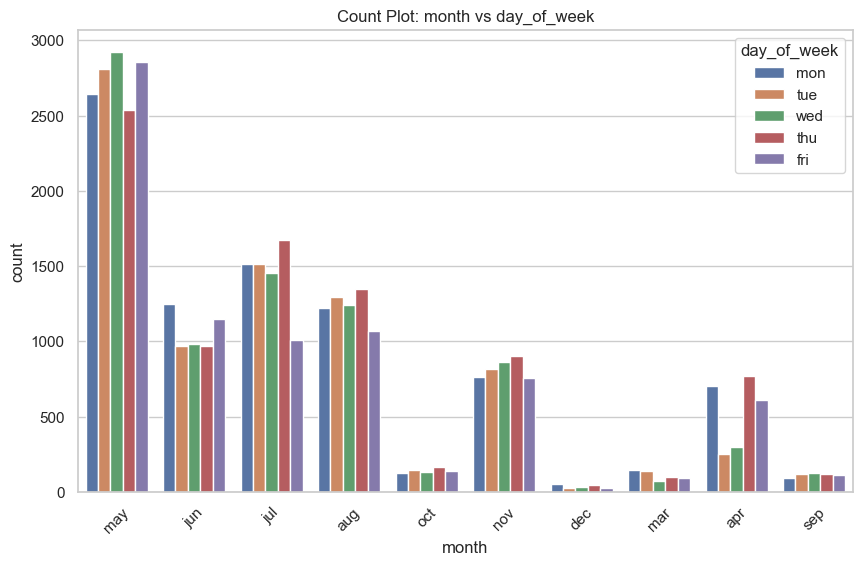

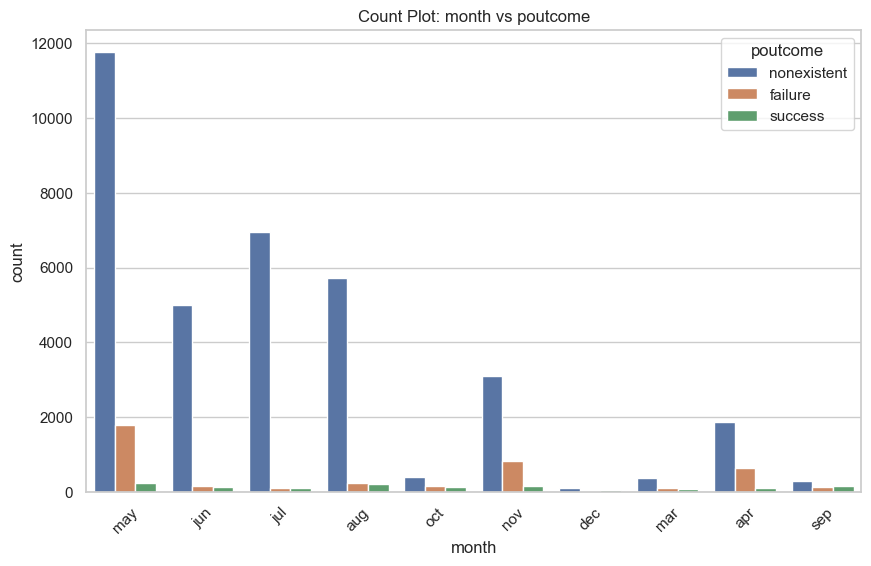

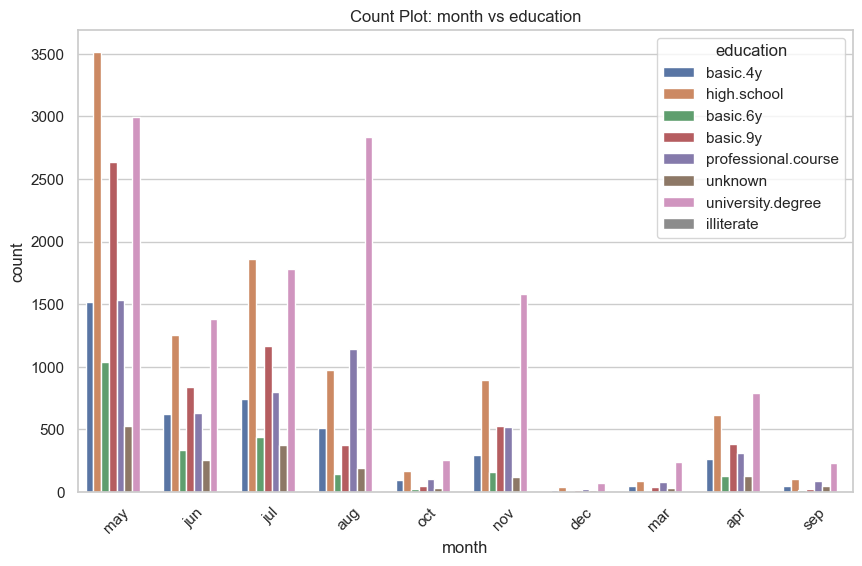

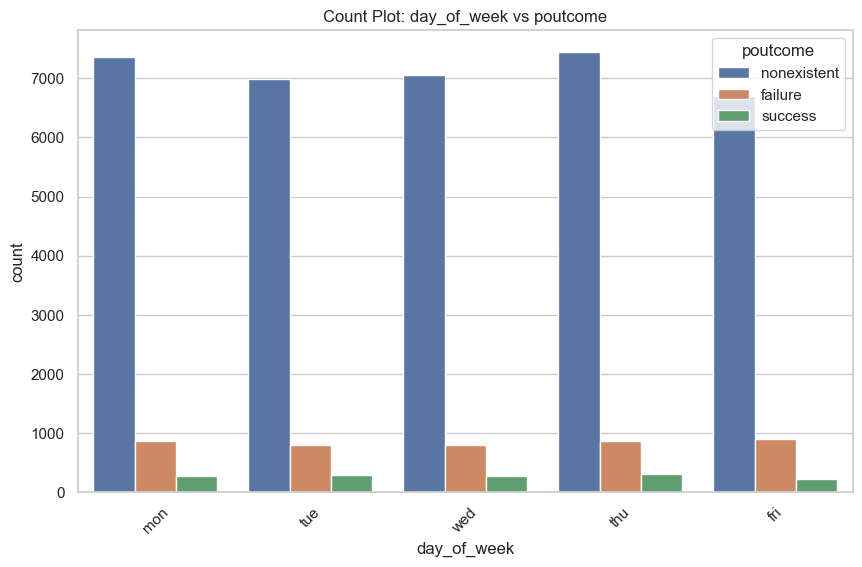

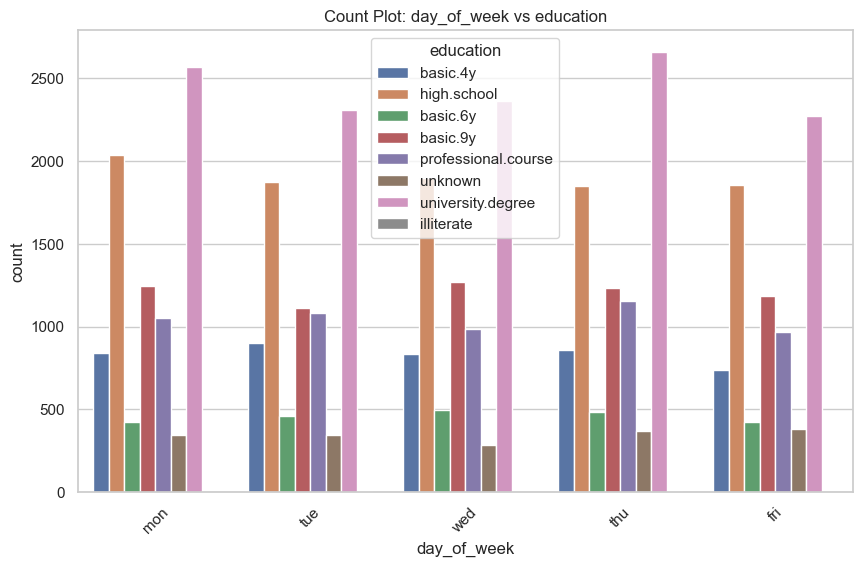

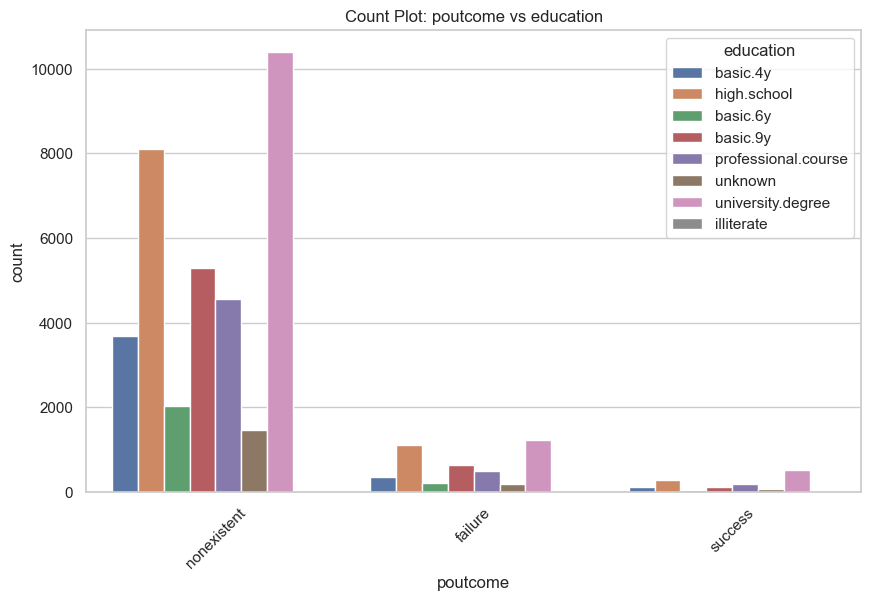

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
# df = ...

# Loop through pairs of categorical variables and create count plots
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i < j:
            plt.figure(figsize=(10, 6))
            sns.countplot(x=col1, hue=col2, data=df)
            plt.xticks(rotation=45)
            plt.title(f'Count Plot: {col1} vs {col2}')
            plt.show()



#### Categorical Targe vs. Categorical Predictors

#### Correlation Analysis

In [67]:
#df_corr = pd.concat([df[num_cols], y_train], axis=1)

In [4]:
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

In [5]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [6]:
# Assuming your DataFrame is named df
correlation_matrix = df[num_cols].corr()


# Print the correlation matrix
print(correlation_matrix)


                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   
y               0.030399  0.405274 -0.066357 -0.324914  0.230181   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968       

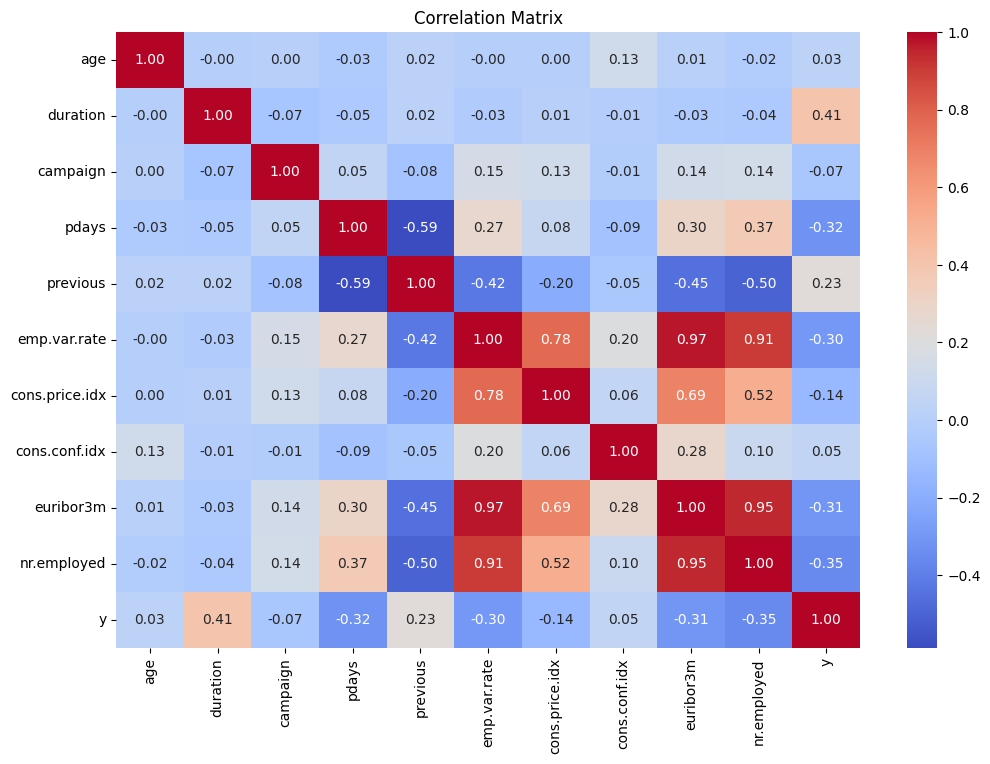

In [9]:
# Generate a heatmap for the correlation matrix
correlation_matrix.style.background_gradient(cmap='PuBu')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [99]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [119]:
df.default.value_counts()

default
1    32588
0     8600
Name: count, dtype: int64

In [14]:
df.default = df.default.map({'no': 1, 'yes': 0, 'unknown': 0})
df.loan = df.loan.map({'yes': 1, 'no': 0, 'unknown': 0})
df.housing = df.housing.map({'yes': 1, 'no': 0, 'unknown': 0})
df.contact = df.contact.map({'cellular': 1, 'telephone': 0})

df['pdays'] = df['pdays'].apply(lambda x: 1 if x != 999 else 0)

df.poutcome = df.poutcome.map({'nonexistent': 0, 'failure': 0, 'success': 1})

- `emp.var.rate`
- `cons.price.idx`
- `cons.conf.idx`
- `nr.employed`
- `euribor3m`
- `duration`
- `age`
- `campaign`
- `marital`
- `education`
- `job`, `month`, `day_of_week`

In [26]:
df['emp.var.rate'] = np.log(df['emp.var.rate'])
df['cons.price.idx'] = np.log(df['cons.price.idx'])
df['nr.employed'] = np.log(df['nr.employed'])
df['duration'] = np.log(df['duration'])
df['euribor3m'] = np.log(df['euribor3m'])
df['age'] = np.log(df['age'])
df['campaign'] = np.log(df['campaign'])



/Users/rashidbaset/Downloads/Banking-marketing-campaign/Banking-Marketing-Campaign/myenv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


- one hot encoding for marital, education, job, month, day_of_week
- fit model
- evaluate 
- improve

In [27]:
df['campaign'].value_counts()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
30        7
31        7
35        5
33        4
32        4
34        3
43        2
40        2
42        2
39        1
56        1
37        1
41        1
Name: count, dtype: int64